#**Exploration de Data et Dataviz**


Nous allons explorer trois secteurs du cac 40 : industrie , luxe et finance

Exploration des Data:

l'API YahooFinance est la source principale de nos données. Pour cela nous importons les deux packages pandas_datareader et yfinance a l'aide de la commande :

● pip install pandas_datareader

● pip install yfinance

L'idée est de se baser sur ces packages pour extraire les données financières associées au CAC40

In [1]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
#On choisi 3 groupes dans la catégorie "Industrie"
data = yf.Ticker("^FCHI")
#CAC40 histo
end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

data_CAC40 = data.history(period="4y")
data_CAC40.tail()

Open         High          Low        Close  \
Date                                                                            
2023-06-14 00:00:00+02:00  7290.939941  7358.990234  7288.459961  7328.529785   
2023-06-15 00:00:00+02:00  7304.970215  7313.470215  7246.330078  7290.910156   
2023-06-16 00:00:00+02:00  7312.069824  7403.879883  7297.729980  7388.649902   
2023-06-19 00:00:00+02:00  7353.310059  7362.439941  7302.629883  7314.049805   
2023-06-20 00:00:00+02:00  7303.240234  7322.569824  7281.120117  7294.169922   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-06-14 00:00:00+02:00   66153600        0.0           0.0  
2023-06-15 00:00:00+02:00   60422800        0.0           0.0  
2023-06-16 00:00:00+02:00  170731900        0.0           0.0  
2023-06-19 00:00:00+02:00          0        0.0           0.0  
2023-06-20 00:00:00+02:00          0        0.0           0.0

Le package pandas_datareader permet de récupérer moyenannt les paramètres de data l'historique des KPI financiers suivants:

● Date : date de la cotation

● High : le prix le plus haut atteint de la période

● Low : le prix le plus bas de la période

● Open : le prix de cotation au début de la période

● Close : le prix de cotation a la fermeture de la période

● Volume : Le nombre de titres échangés de la période


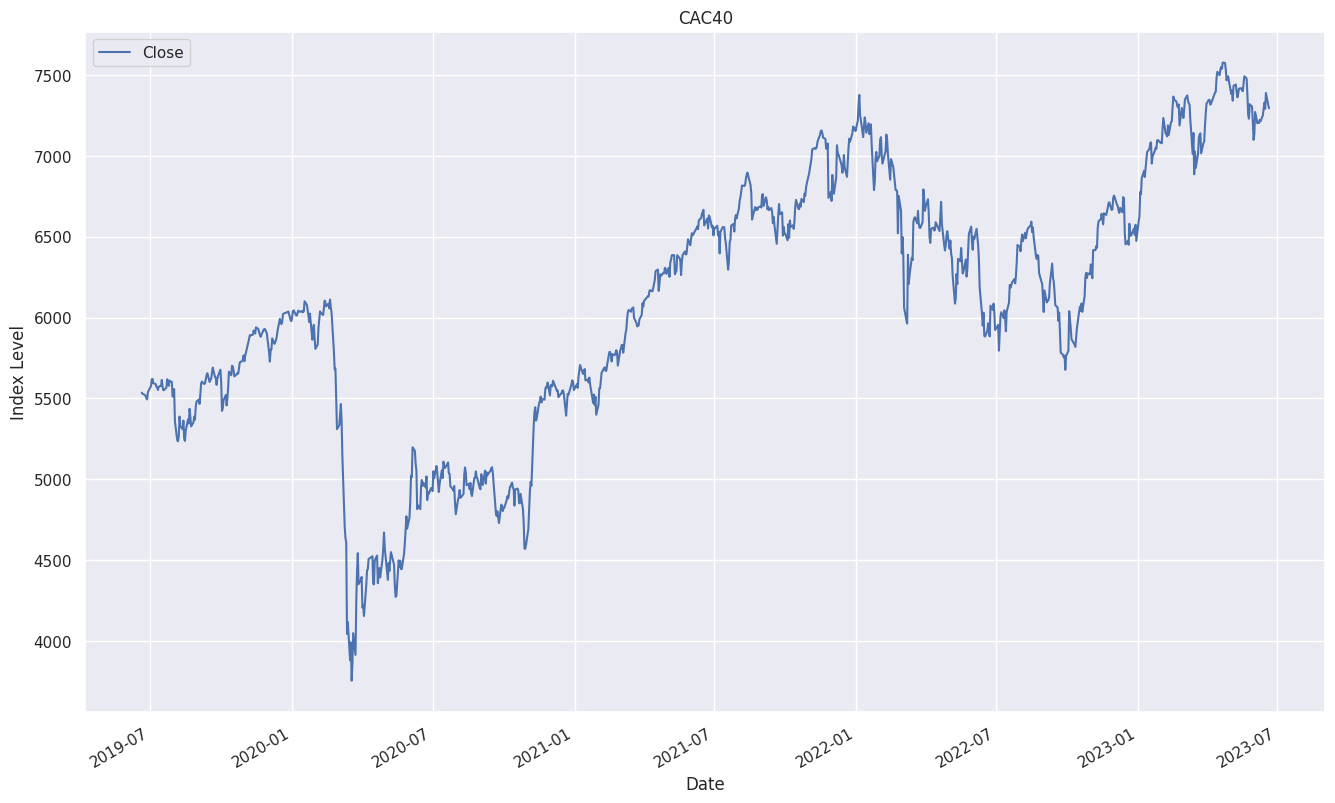

In [2]:
#init
sns.set_theme()
#plot du niveau d'indice
data_CAC40.plot (y = ['Close'], figsize =  (16,10))
plt.title ('CAC40')
plt.ylabel ('Index Level')
plt.legend()
plt.show();

Le graphique ci dessus retrace l'évolution de l'indice de la place de Paris entre 2018 et fin 2022, On remarque une chute bien visible sur le premier trimestre 2020 ça correspond exactement à l'impact de la pandémie du COVID19 ( couvre feu,recul de l'économie,...) .

Il s'ensuit une tendance haussière à partir du deuxième trimestre, notamment avec la production des vaccins et la fin des couvre feu ce qui a permis une reprise économique prononcée.


Observation des actions du secteur financier :

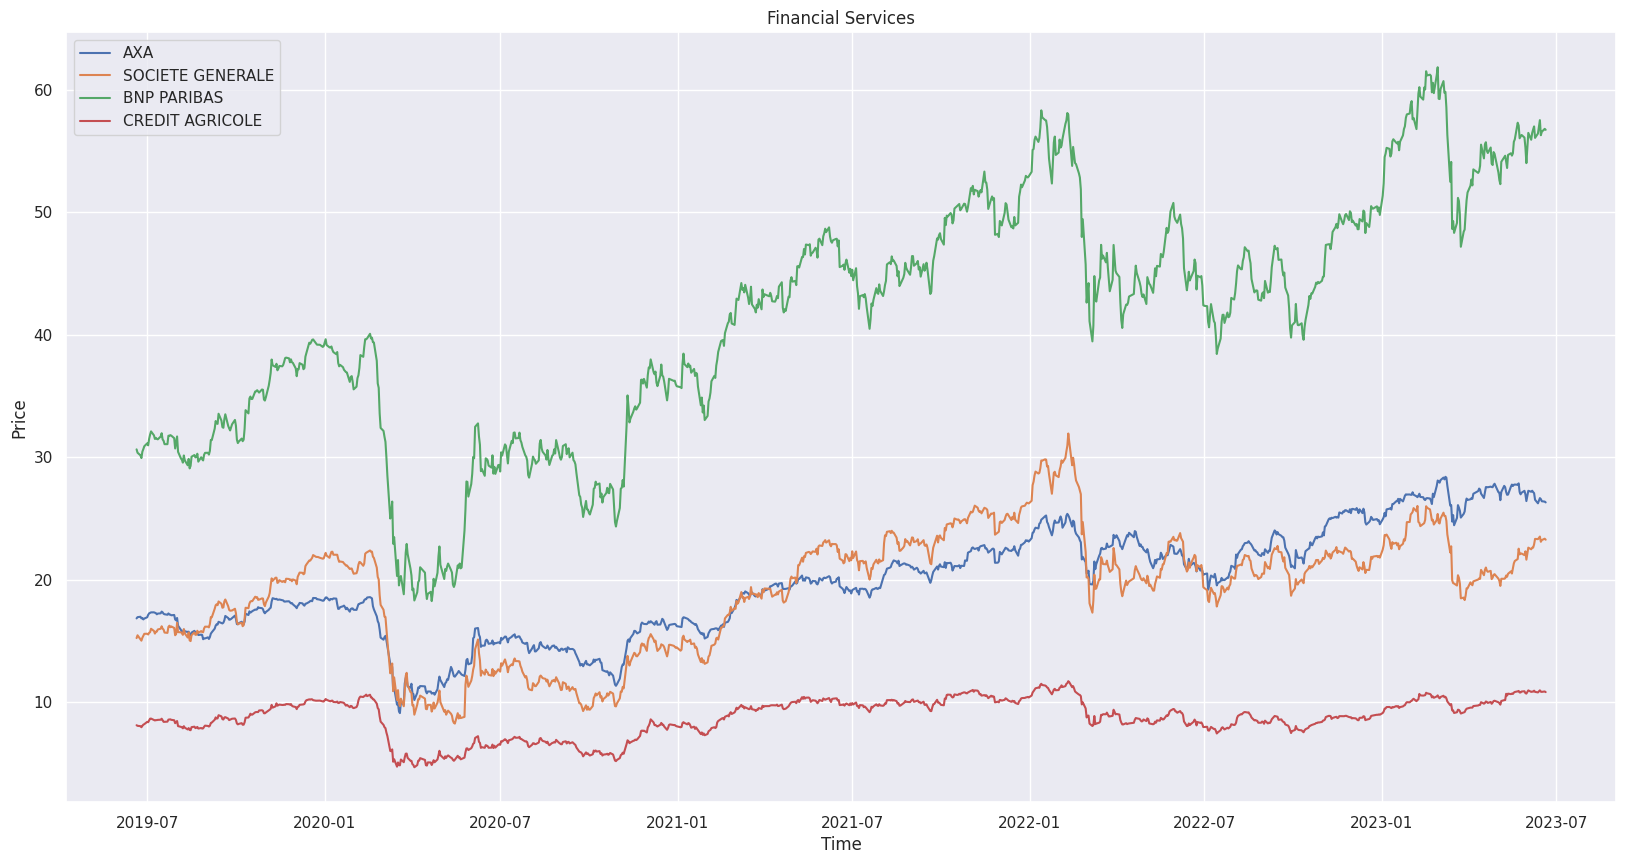

In [3]:
sns.set_theme()
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

ticker = ['CS.PA',
'GLE.PA',
'BNP.PA',
'ACA.PA']

Consumer = ['AXA','SOCIETE GENERALE',
'BNP PARIBAS','CREDIT AGRICOLE'
]
d = {}

plt.figure ( figsize = (20,10)  )   #taille de la figure

#get data from yahoo avec les tickers YahooFinance
for company , ticket in zip(Consumer ,ticker) :
    try:
        y_data = yf.Ticker(ticket)
        d[company]=y_data.history(period="4y")
    except:
        continue
    plt.plot( d [company].index, d [company]['Close'], label = company)   #plot




#plot
plt.title ('Financial Services')
plt.xlabel ('Time')
plt.ylabel ('Price')
plt.legend(loc='upper left')
plt.show();





Observations du secteur finance:

Les Equities du secteur financier ont des tendances stables mais subissent fortement la crise du covid 19 en 2020, aussi on peut remarquer visuelement que la courbe des equities du secteur financier est fortement similaire à celle de l'indice CAC40, ce qui signifie que le secteur financier impacte fortement l'indice et donc contribue directement à la performance de l'indice


In [4]:
d['AXA'].describe() #Statistiques du DataFrame associé à l'action AXA

Open         High          Low        Close        Volume  \
count  1027.000000  1027.000000  1027.000000  1027.000000  1.027000e+03   
mean     19.669789    19.865166    19.467242    19.671109  6.236592e+06   
std       4.384529     4.397945     4.377923     4.384235  3.696180e+06   
min       8.993596     9.449465     8.625113     9.098460  0.000000e+00   
25%      16.385093    16.517922    16.222482    16.365265  4.149367e+06   
50%      19.690780    19.831904    19.470796    19.670027  5.170920e+06   
75%      22.735429    22.935716    22.513412    22.712195  6.997749e+06   
max      28.378718    28.552820    28.228143    28.392834  3.571247e+07   

         Dividends  Stock Splits  
count  1027.000000        1027.0  
mean      0.006650           0.0  
std       0.097926           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       1.700000           0.0

In [5]:
d['AXA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1027 entries, 2019-06-20 00:00:00+02:00 to 2023-06-20 00:00:00+02:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1027 non-null   float64
 1   High          1027 non-null   float64
 2   Low           1027 non-null   float64
 3   Close         1027 non-null   float64
 4   Volume        1027 non-null   int64  
 5   Dividends     1027 non-null   float64
 6   Stock Splits  1027 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.2 KB


Afin de différencier les tendances par action, on va afficher l'historique des cours de clôture par action

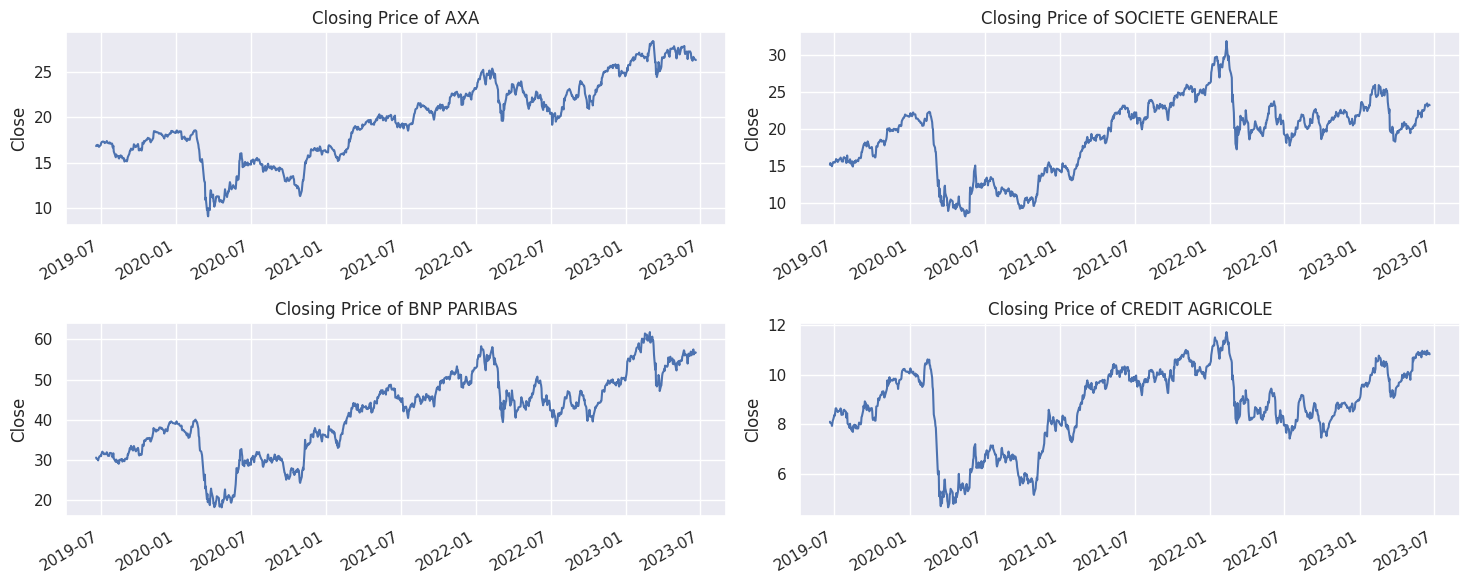

In [6]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {Consumer[i - 1]}")

plt.tight_layout()


Le cours de l'action nous donne une idée de l'évolution de l'action unitaire au niveau du marché, le prix d'action dépend aussi du volume tradé courant la période.

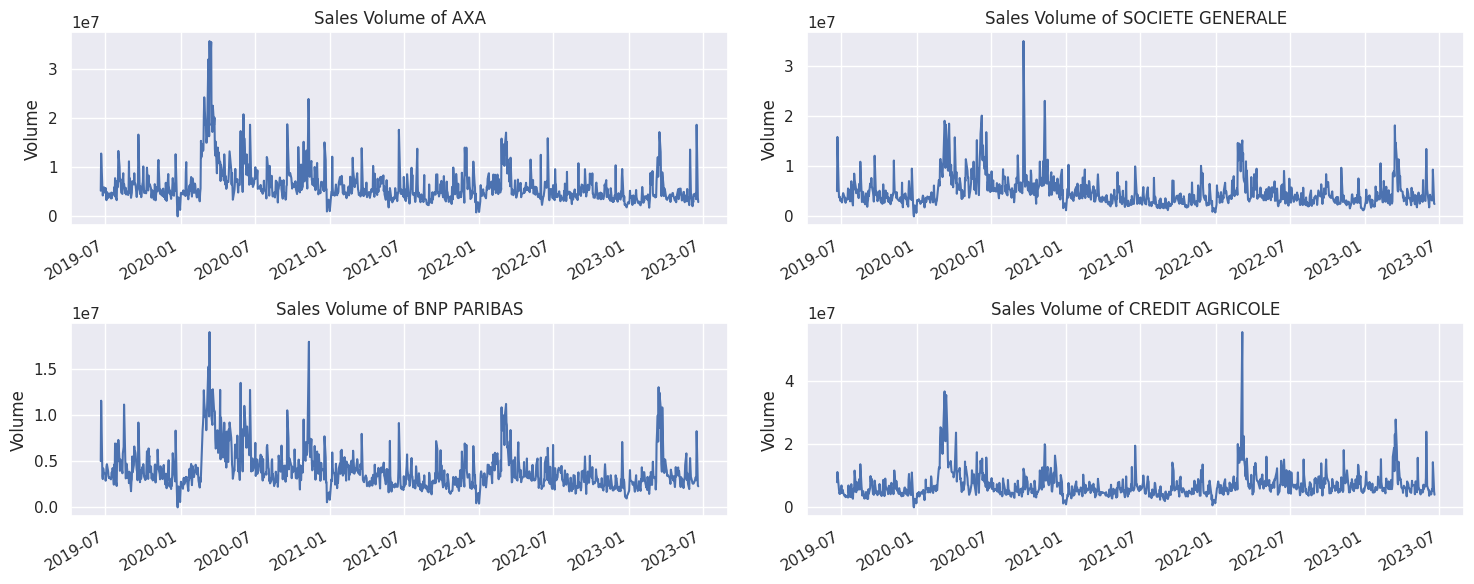

In [7]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {Consumer[i - 1]}")

plt.tight_layout()

Maintenant que nous avons vu les visualisations du cours de clôture et du volume échangé chaque jour,calculons la moyenne mobile du cours de l'action.



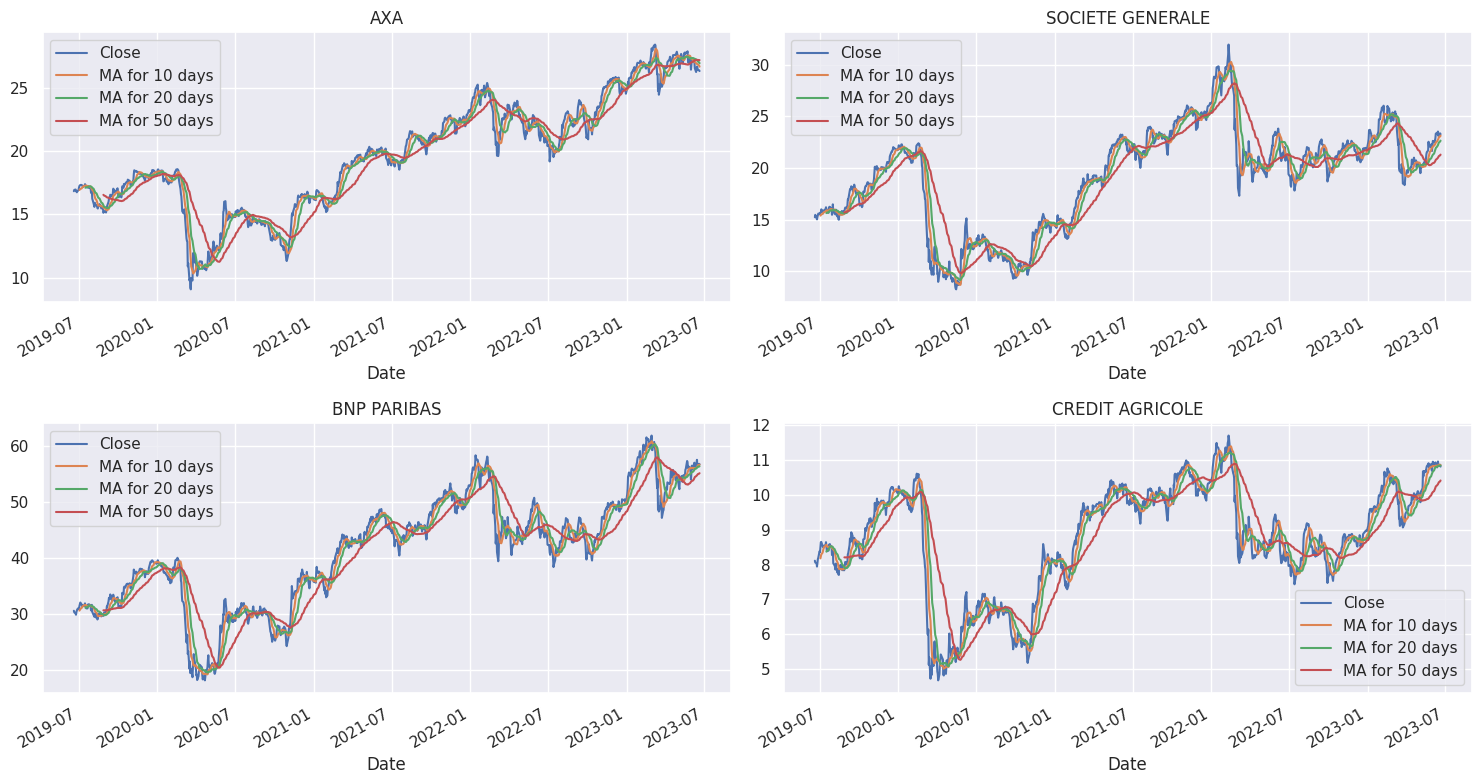

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in Consumer:
        column_name = f"MA for {ma} days"
        d[company][column_name] = d[company]['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

d['AXA'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AXA')

d['SOCIETE GENERALE'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SOCIETE GENERALE')

d['BNP PARIBAS'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BNP PARIBAS')

d['CREDIT AGRICOLE'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('CREDIT AGRICOLE')

fig.tight_layout()


Calculons à présent le Daily Return par action:

Text(0.5, 1.0, 'CREDIT AGRICOLE')

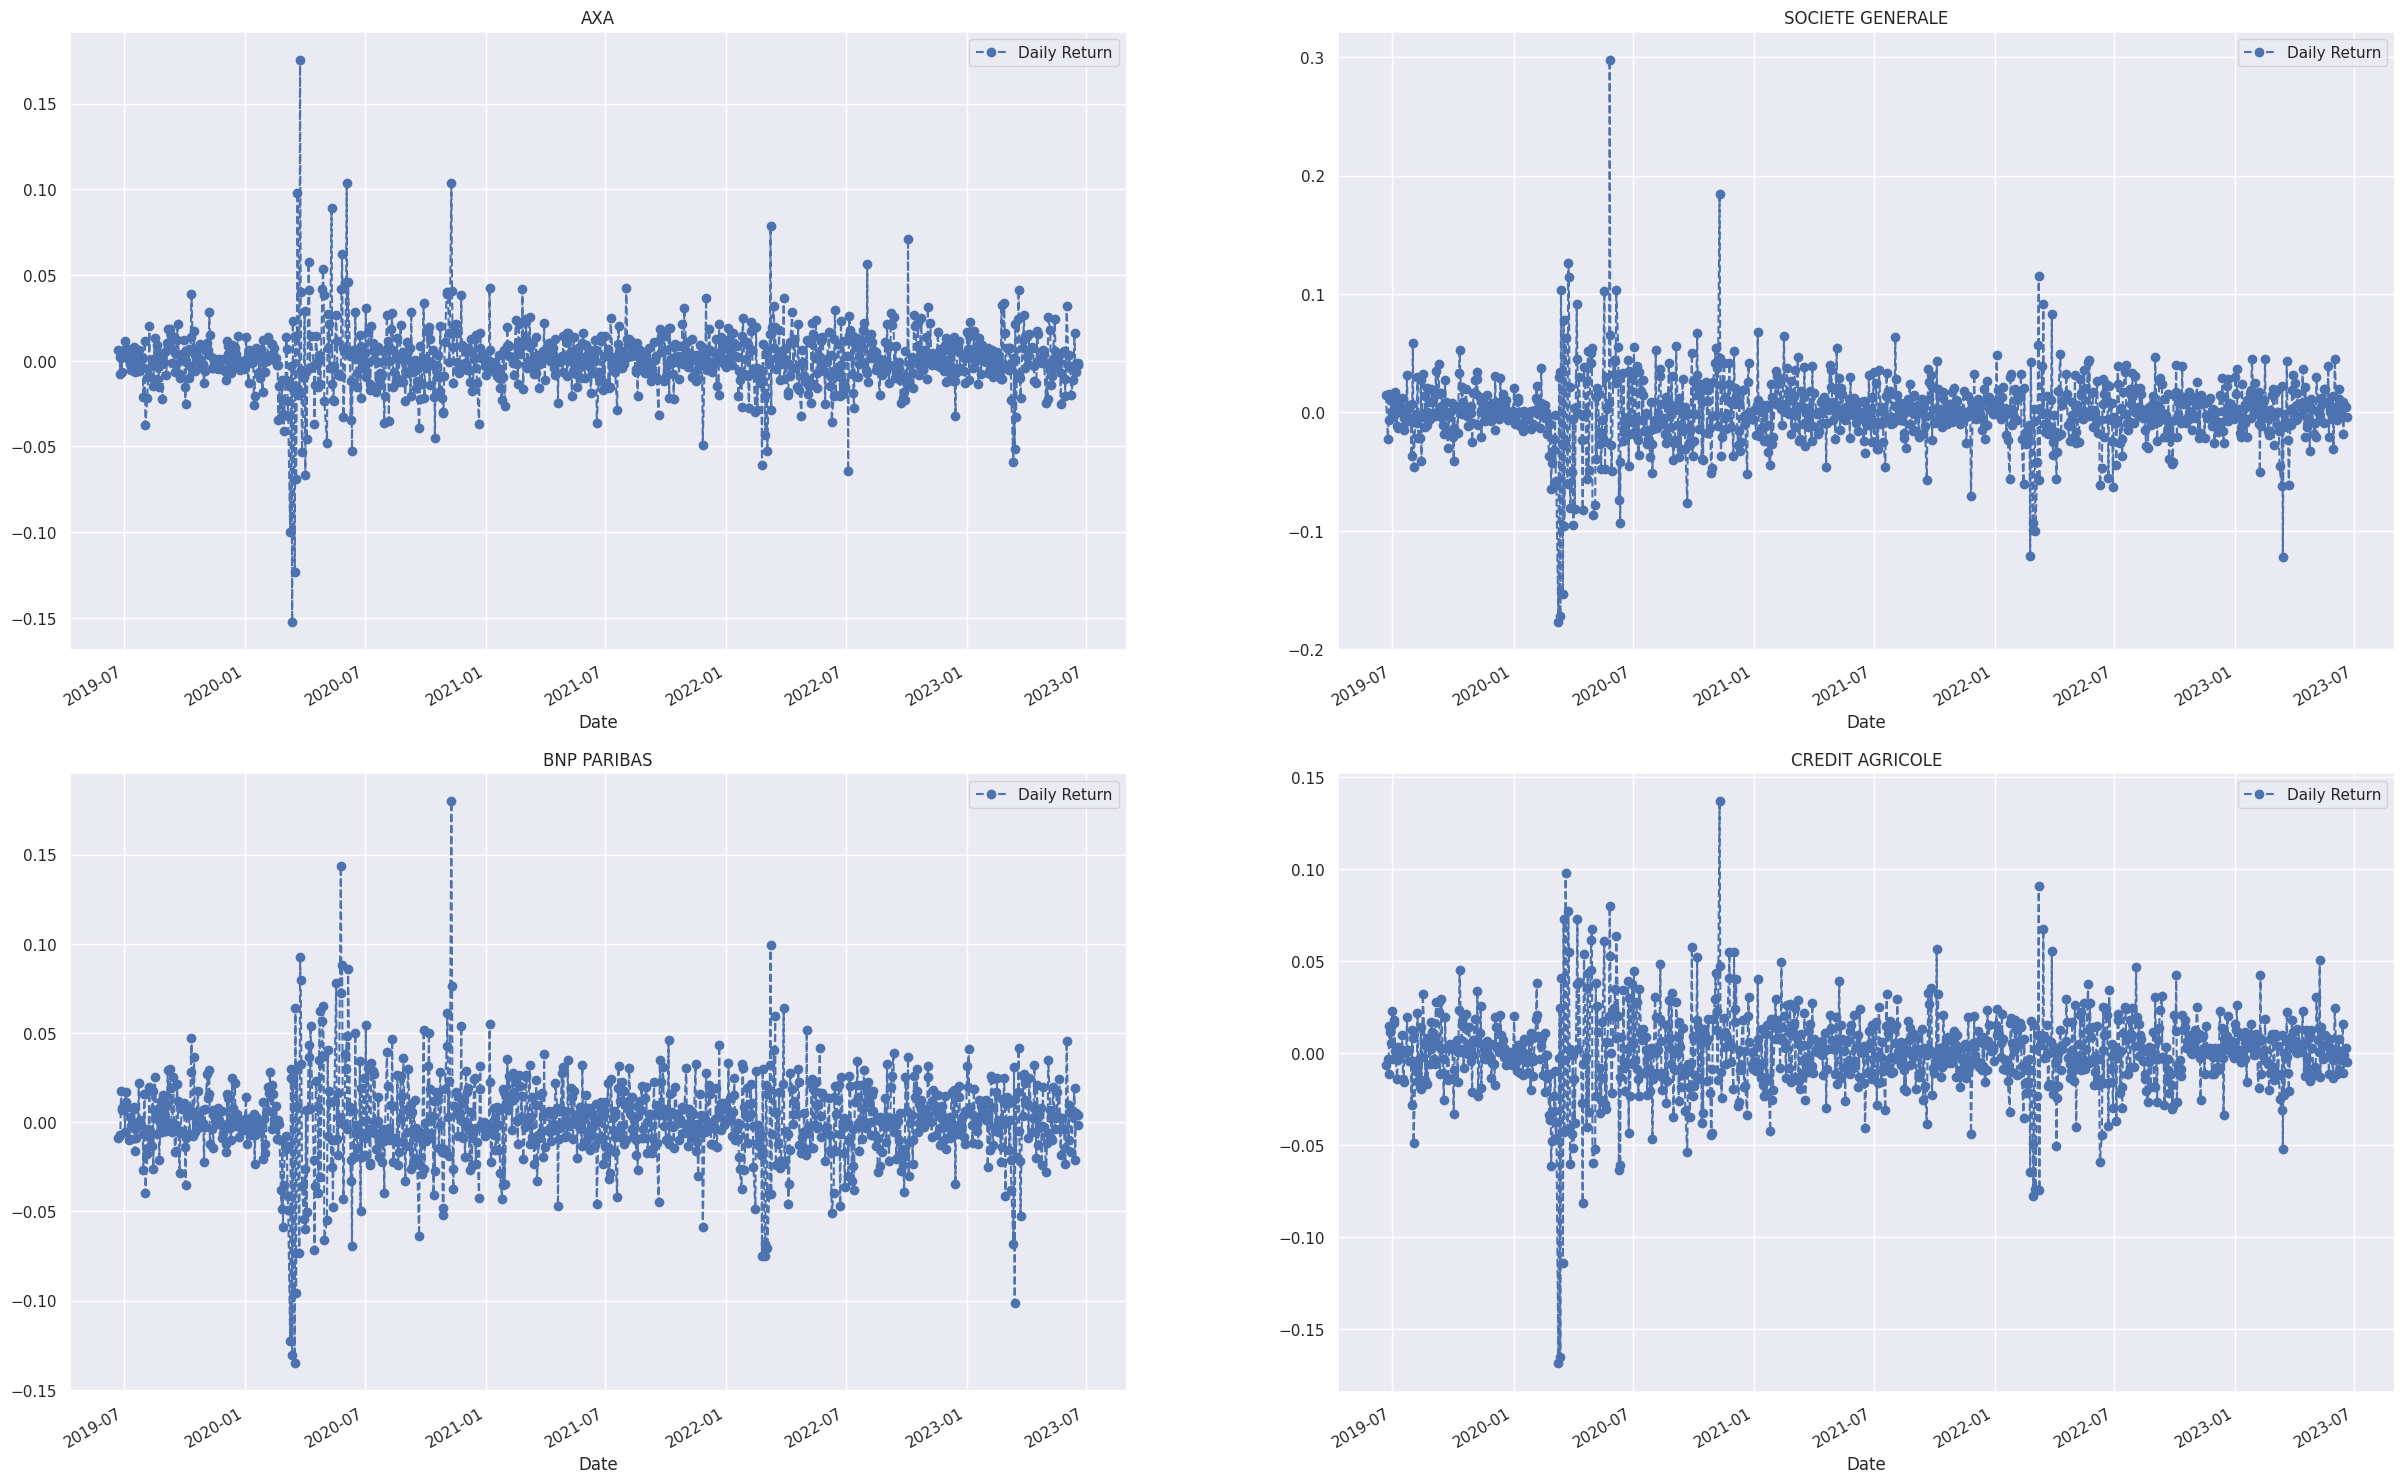

In [9]:
#on va utiliser pct_change pour calculer la variation quotidienne
for company in Consumer:
    d[company]['Daily Return'] = d[company]['Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)

d['AXA']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AXA')

d['SOCIETE GENERALE']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('SOCIETE GENERALE')

d['BNP PARIBAS']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BNP PARIBAS')

d['CREDIT AGRICOLE']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('CREDIT AGRICOLE')



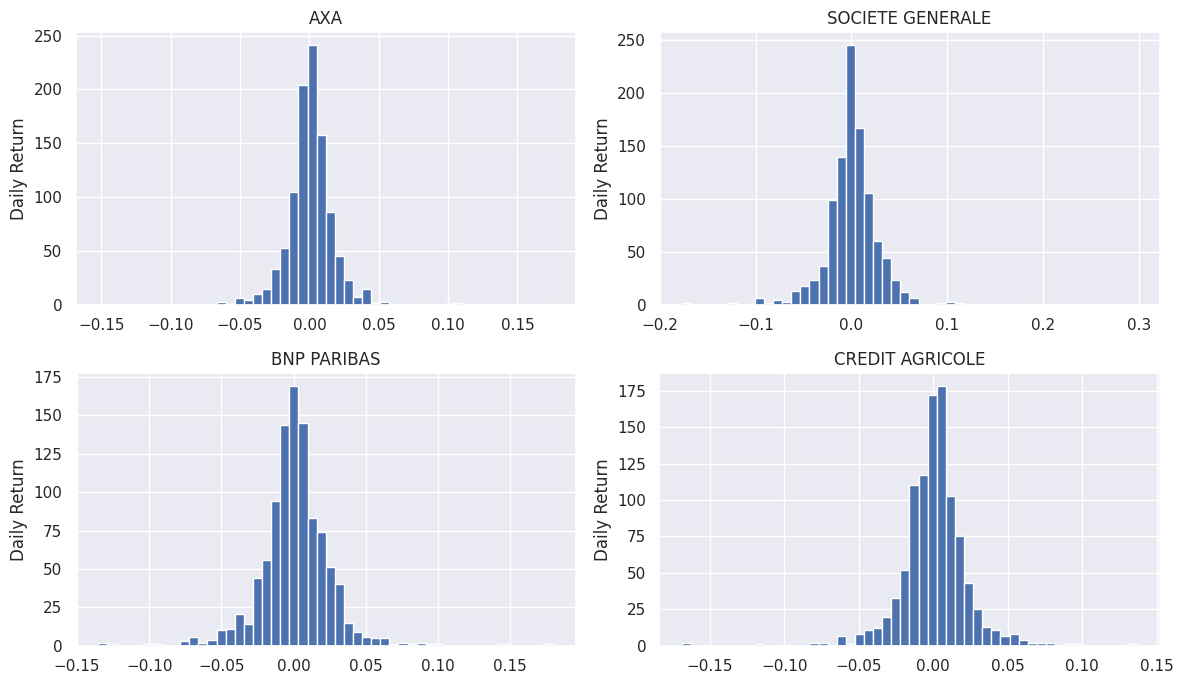

In [10]:
fig.tight_layout()

plt.figure(figsize=(12, 7))

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{Consumer[i - 1]}')

plt.tight_layout()


In [11]:
Ytickers_df=yf.download(tickers = ticker,  # list of tickers
            period = "4y",         # time period
            interval = "1d",       # trading interval
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)

[*********************100%***********************]  4 of 4 completed


In [12]:
closing_df=Ytickers_df['Close']
Fin_returns=closing_df.pct_change()
Fin_returns.tail()

ACA.PA    BNP.PA     CS.PA    GLE.PA
Date                                              
2023-06-14  0.015755  0.019316  0.016203  0.009011
2023-06-15 -0.010584 -0.021384 -0.003001 -0.018074
2023-06-16 -0.000922  0.004974 -0.006585  0.006063
2023-06-19  0.002954  0.004243 -0.001136  0.004735
2023-06-20 -0.004786 -0.001408 -0.002465 -0.003428

Analysons la corrélation entre la sélection d'actions financières du CAC40:

Nous pouvons donc maintenant voir que si deux actions sont parfaitement (et positivement) corrélées entre elles, une relation linéaire entre leurs valeurs de rendement quotidiennes devrait se produire.

Seaborn et pandas permettent de répéter très facilement cette analyse comparative pour chaque combinaison possible d'actions dans notre liste d'equities. Nous utiliserons sns.pairplot()

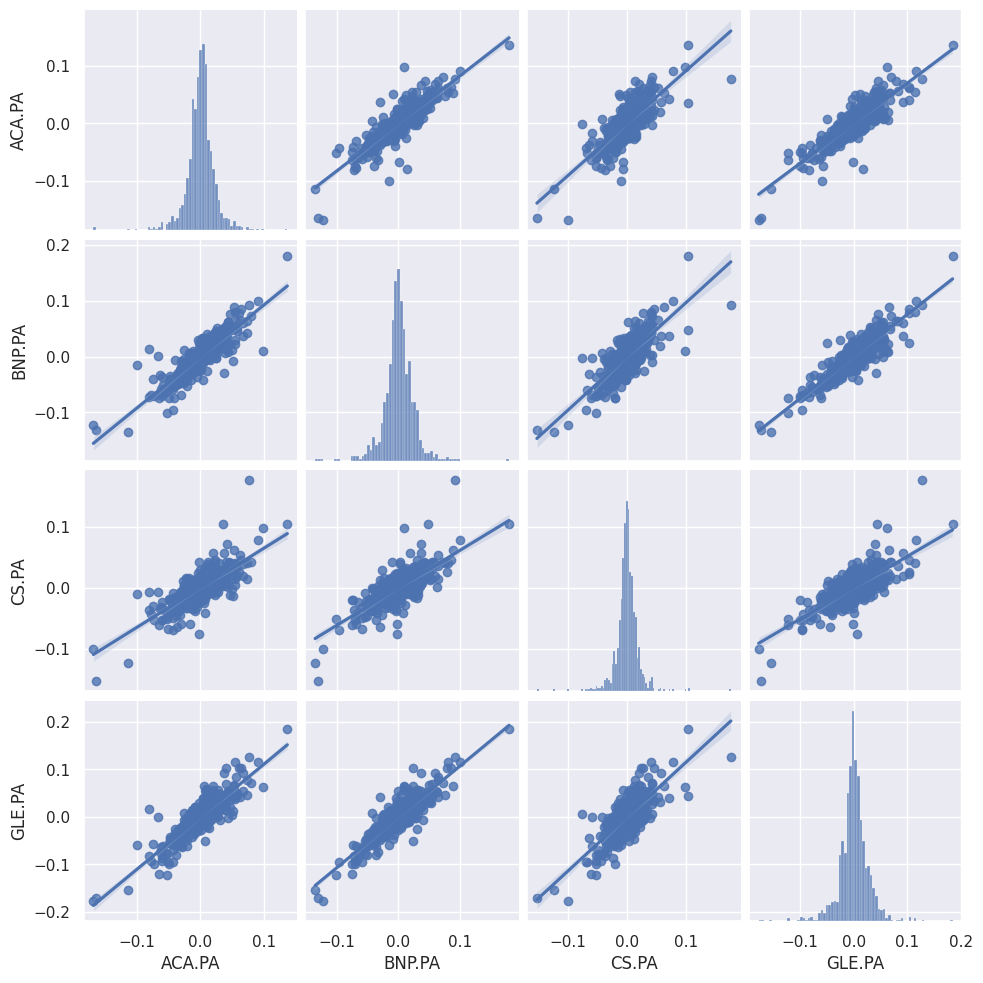

In [13]:
sns.pairplot(Fin_returns,kind='reg')

L'analyse de la corrélation entre notre sélection d'equities peutêtre faites à travers la heatmap sns.heatmap()

<Axes: >

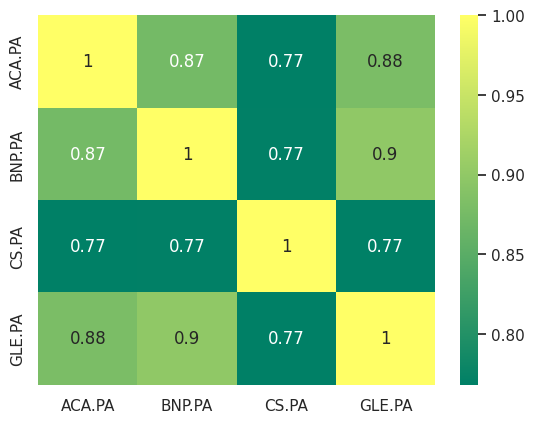

In [14]:
sns.heatmap(Fin_returns.corr(), annot=True, cmap='summer')

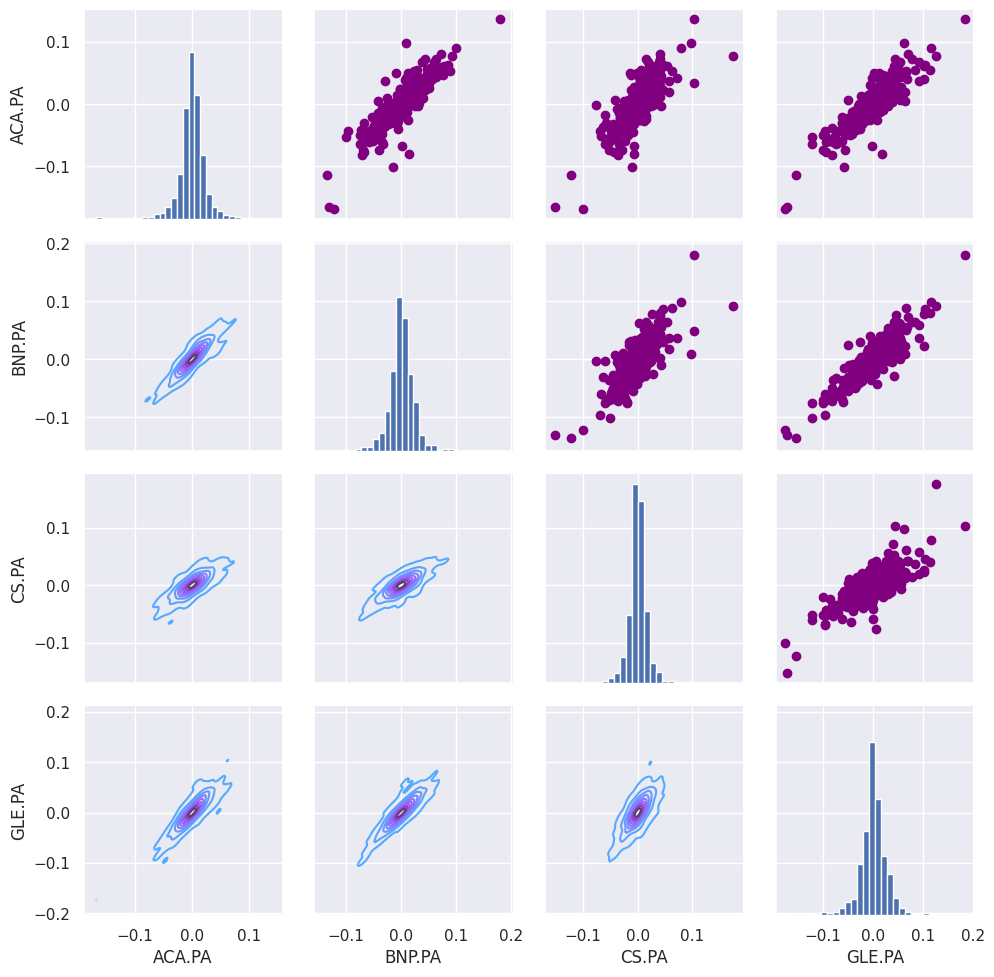

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(Fin_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Nous pouvons Quantifier le risk de notre investissement en comparant l'expected return à l'écart type des returns journaliers récupérés

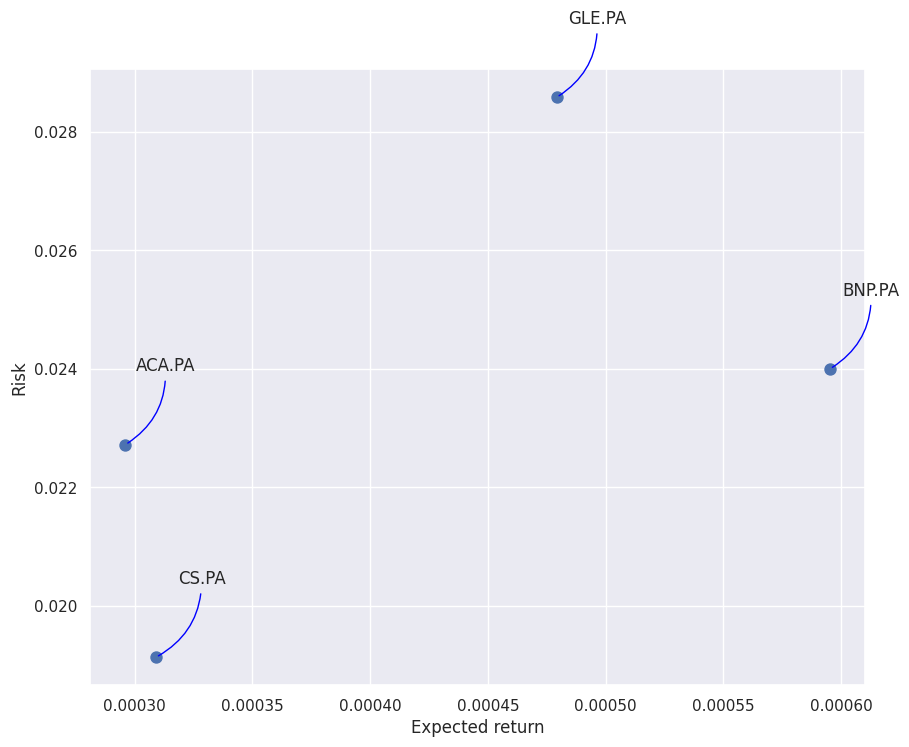

In [16]:
import numpy as np

rets = Fin_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Observation des actions du secteur de l'industrie

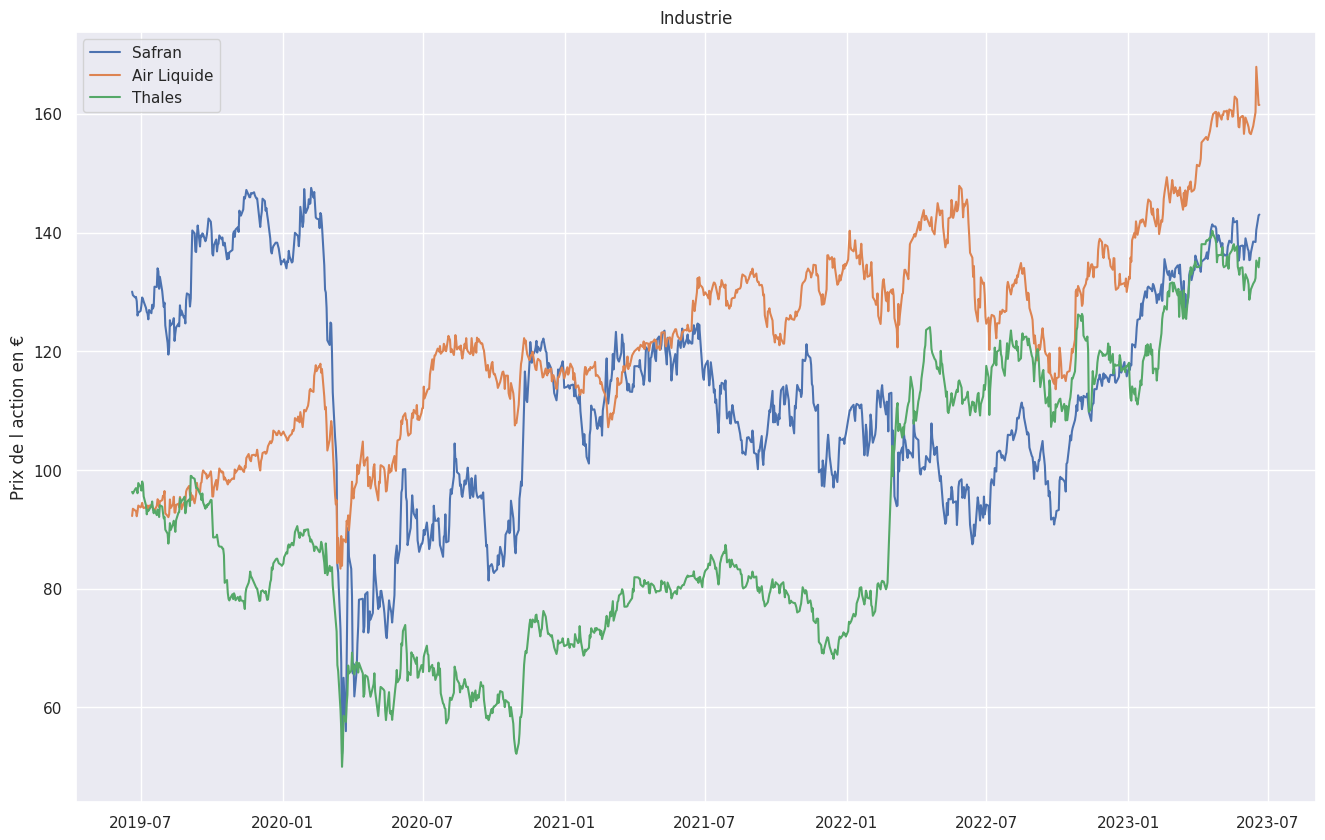

In [17]:
import yfinance as yf
#On choisi 3 groupes dans la catégorie "Industrie"
SafranInfo = yf.Ticker("SAF.PA")
AirLiquideInfo = yf.Ticker("AI.PA")
ThalesInfo = yf.Ticker("HO.PA")

data_safran = SafranInfo.history(period="4y")
data_air = AirLiquideInfo.history(period="4y")
data_thales = ThalesInfo.history(period="4y")

plt.figure(figsize=(16,10))
plt.plot (data_safran.index,data_safran["Close"], label="Safran")
plt.plot(data_air.index, data_air["Close"], label = "Air Liquide")
plt.plot(data_thales.index, data_thales["Close"], label = "Thales")
plt.title ('Industrie')
plt.ylabel ('Prix de l action en €')
plt.legend()
plt.show()

In [18]:
data_safran.tail()

Open        High         Low       Close  \
Date                                                                        
2023-06-14 00:00:00+02:00  139.399994  139.740005  138.199997  138.440002   
2023-06-15 00:00:00+02:00  138.199997  138.839996  137.520004  138.419998   
2023-06-16 00:00:00+02:00  138.820007  141.320007  138.479996  140.460007   
2023-06-19 00:00:00+02:00  141.000000  143.679993  141.000000  142.899994   
2023-06-20 00:00:00+02:00  142.539993  144.380005  142.139999  143.039993   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-06-14 00:00:00+02:00   551645        0.0           0.0  
2023-06-15 00:00:00+02:00   443775        0.0           0.0  
2023-06-16 00:00:00+02:00  1168726        0.0           0.0  
2023-06-19 00:00:00+02:00   496295        0.0           0.0  
2023-06-20 00:00:00+02:00   472769        0.0           0.0

### Stats du DataFrame contenant les informations de l'action de Safran depuis 1 an.

In [19]:
data_safran.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1027 entries, 2019-06-20 00:00:00+02:00 to 2023-06-20 00:00:00+02:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1027 non-null   float64
 1   High          1027 non-null   float64
 2   Low           1027 non-null   float64
 3   Close         1027 non-null   float64
 4   Volume        1027 non-null   int64  
 5   Dividends     1027 non-null   float64
 6   Stock Splits  1027 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.2 KB


### Afin de différencier les tendances par action, on va afficher l'historique des cours d'ouverture par action


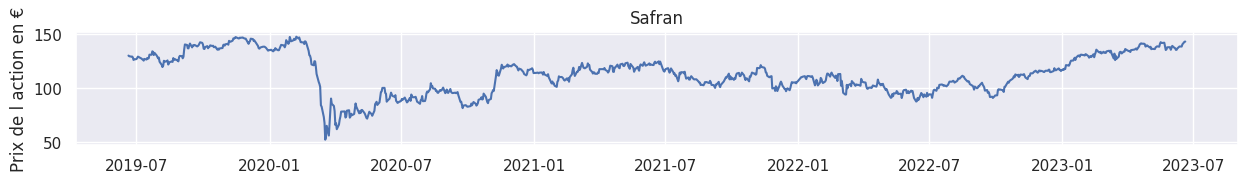

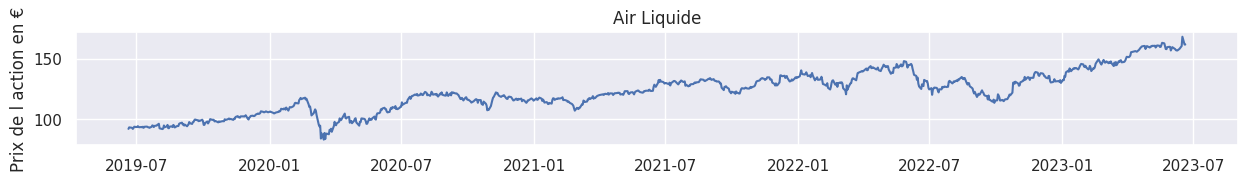

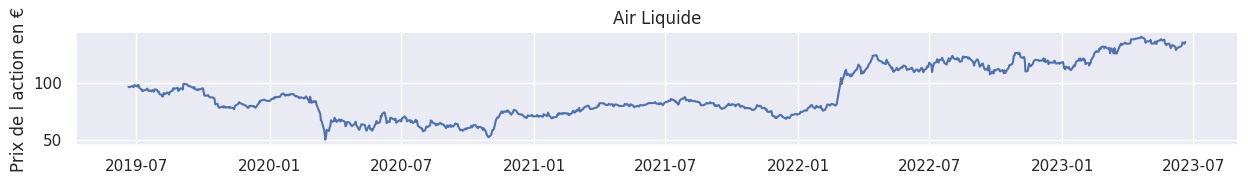

In [20]:
plt.figure(figsize=(15, 5))
#Graphe Safran
plt.subplot(3,1,1)
plt.plot(data_safran.index,data_safran["Close"], label="Safran")
plt.title('Safran')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe Air Liquide
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_air.index, data_air["Close"], label = "Air Liquide")
plt.title('Air Liquide')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe Thales
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_thales.index, data_thales["Close"], label = "Thales")
plt.title('Air Liquide')
plt.ylabel('Prix de l action en €')
plt.show()

### Le cours de l'action nous donne une idée de l'évolution de l'action unitaire au niveau du marché, le prix d'action dépend aussi du volume tradé courant la période.

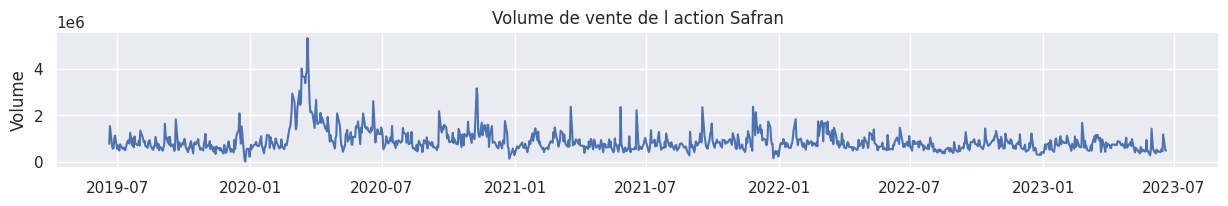

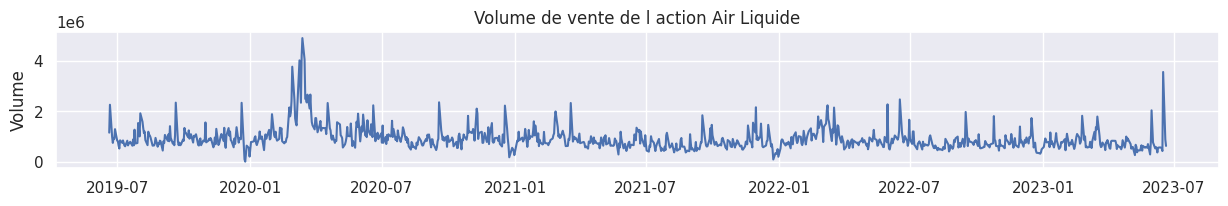

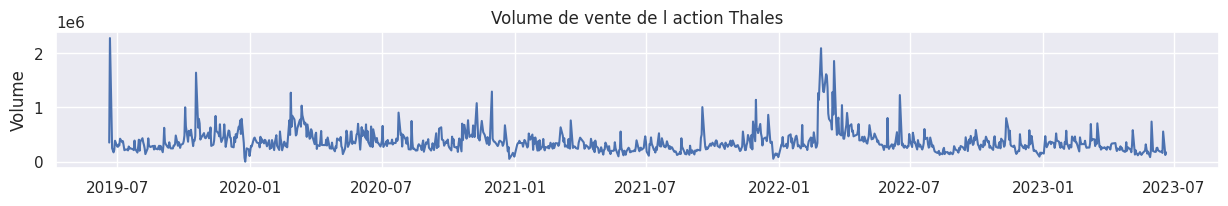

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)

#Safran
plt.plot(data_safran.index,data_safran["Volume"], label="Safran")
plt.title('Volume de vente de l action Safran')
plt.ylabel('Volume')
plt.show();

#Air Liquide
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_air.index, data_air["Volume"], label = "Air Liquide")
plt.title('Volume de vente de l action Air Liquide')
plt.ylabel('Volume')
plt.show();

#Thales
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_thales.index, data_thales["Volume"], label = "Thales")
plt.title('Volume de vente de l action Thales')
plt.ylabel('Volume')
plt.show();

### On remarque que les volumes échangés sont très proches entre les 3 groupes.
Maintenant que nous avons vu les visualisations du cours de clôture et du volume échangé chaque jour,calculons la moyenne mobile de l'action.

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      data_safran[column_name] =  data_safran['Close'].rolling(ma).mean()
      data_air[column_name] = data_air['Close'].rolling(ma).mean()
      data_thales[column_name] = data_thales['Close'].rolling(ma).mean()

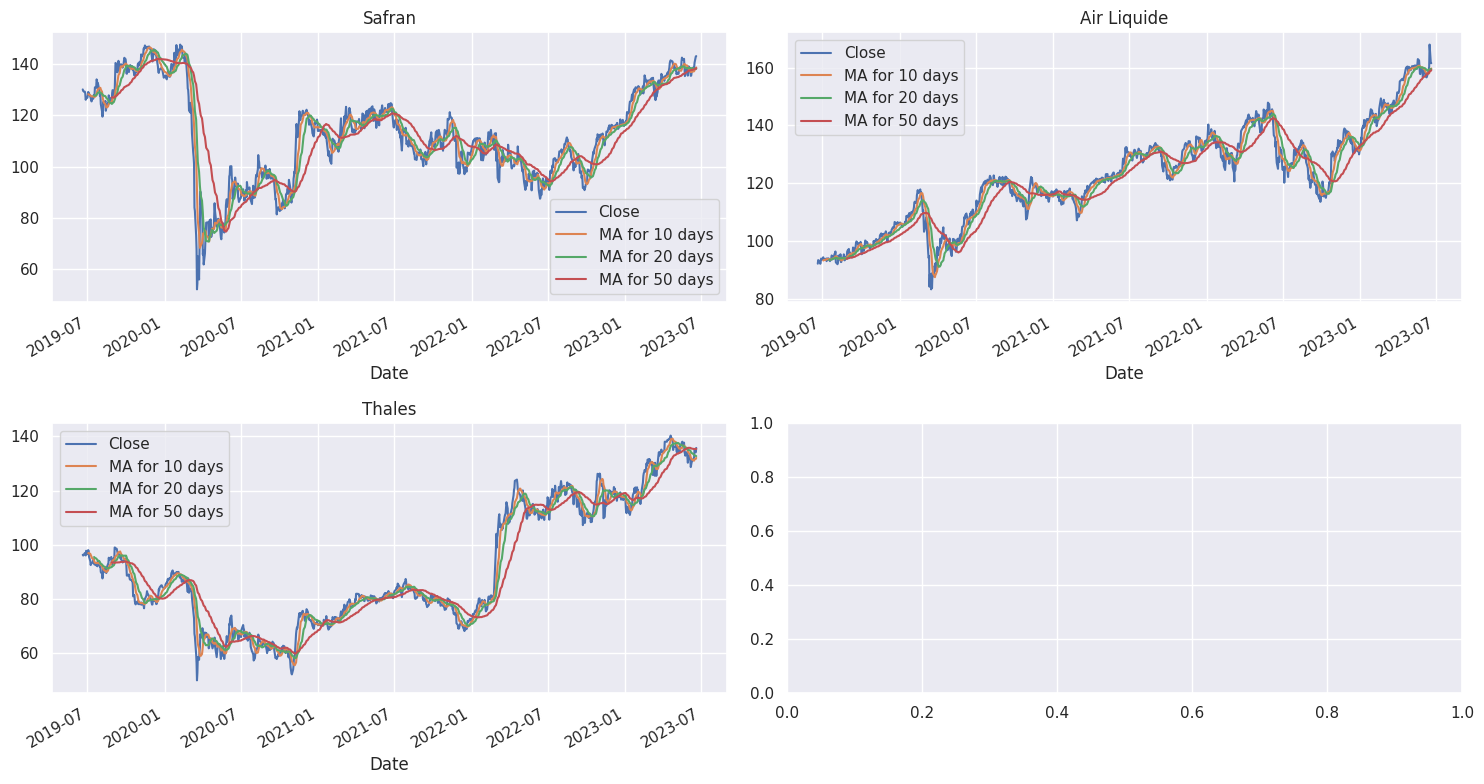

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

data_safran[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Safran')

data_air[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Air Liquide')

data_thales[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Thales')


fig.tight_layout()

### Calculons à présent le Daily Return par action:

In [24]:
data_safran['Daily Return'] = data_safran['Close'].pct_change()
data_air['Daily Return'] = data_air['Close'].pct_change()
data_thales['Daily Return'] = data_thales['Close'].pct_change()

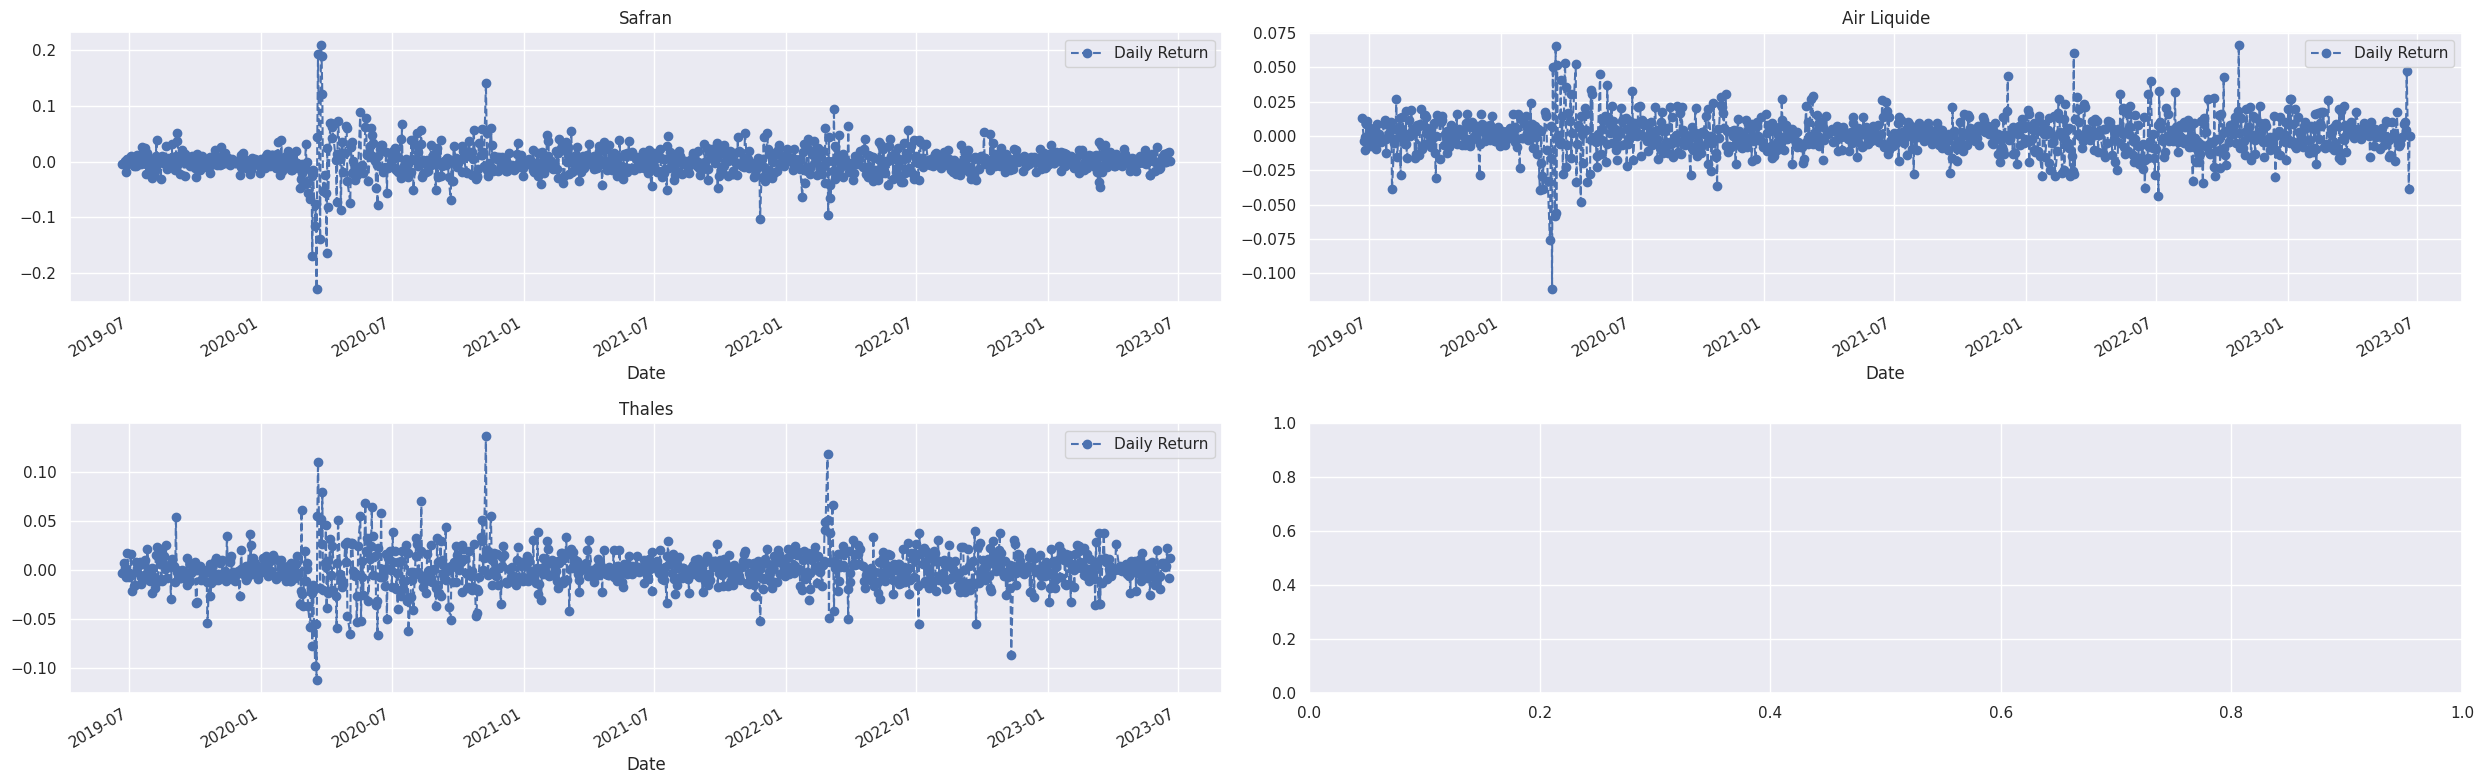

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)

data_safran['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Safran')

data_air['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Air Liquide')

data_thales['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Thales')

fig.tight_layout()

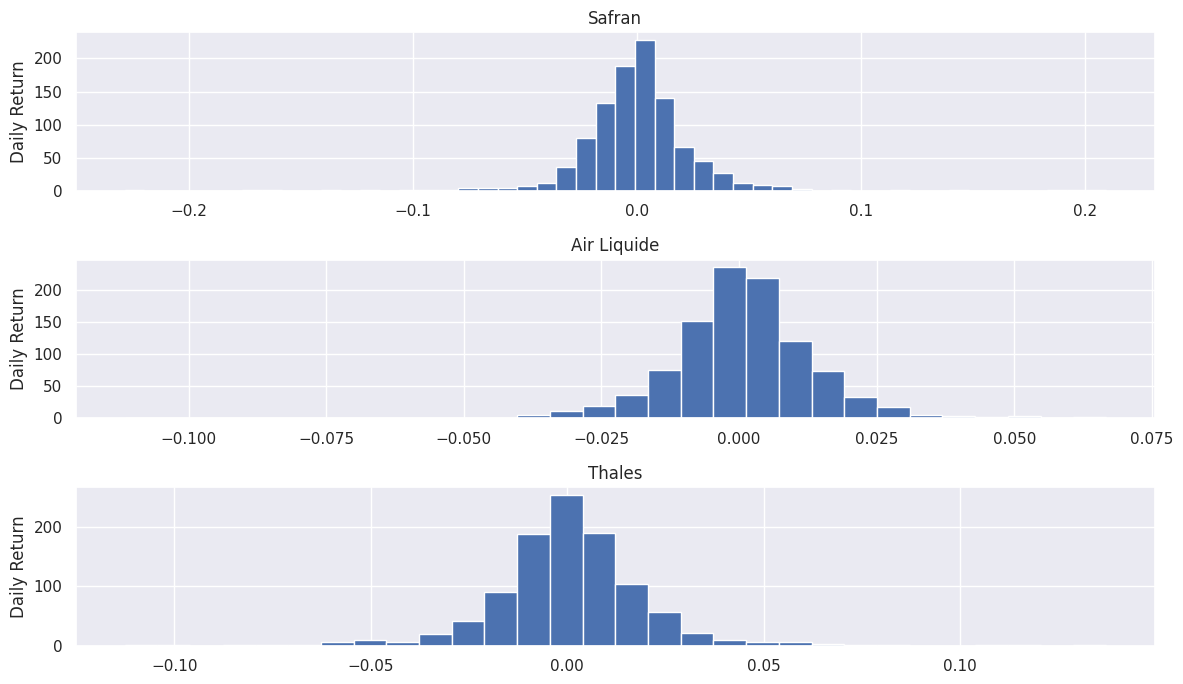

In [26]:
plt.figure(figsize=(12, 7))

#Safran
plt.subplot(3, 1, 1)
data_safran['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Safran')

#Air
plt.subplot(3, 1, 2)
data_air['Daily Return'].hist(bins=30)
plt.ylabel('Daily Return')
plt.title('Air Liquide')

#Thales
plt.subplot(3, 1, 3)
data_thales['Daily Return'].hist(bins=30
                                )
plt.ylabel('Daily Return')
plt.title('Thales')

plt.tight_layout()

On remarque qu'il n'y a pas vraiment de corrélation entre ces 3 groupes. Même si ils font parties du même secteur d'activité "industriel", ils ne sont pas concurrents et ne sont pas sur les mêmes marchés.

Nous pouvons Quantifier le risk de notre investissement en comparant l'expected return à l'écart type des returns journaliers récupérés

##On choisi 3 groupes dans la catégorie "Luxe"



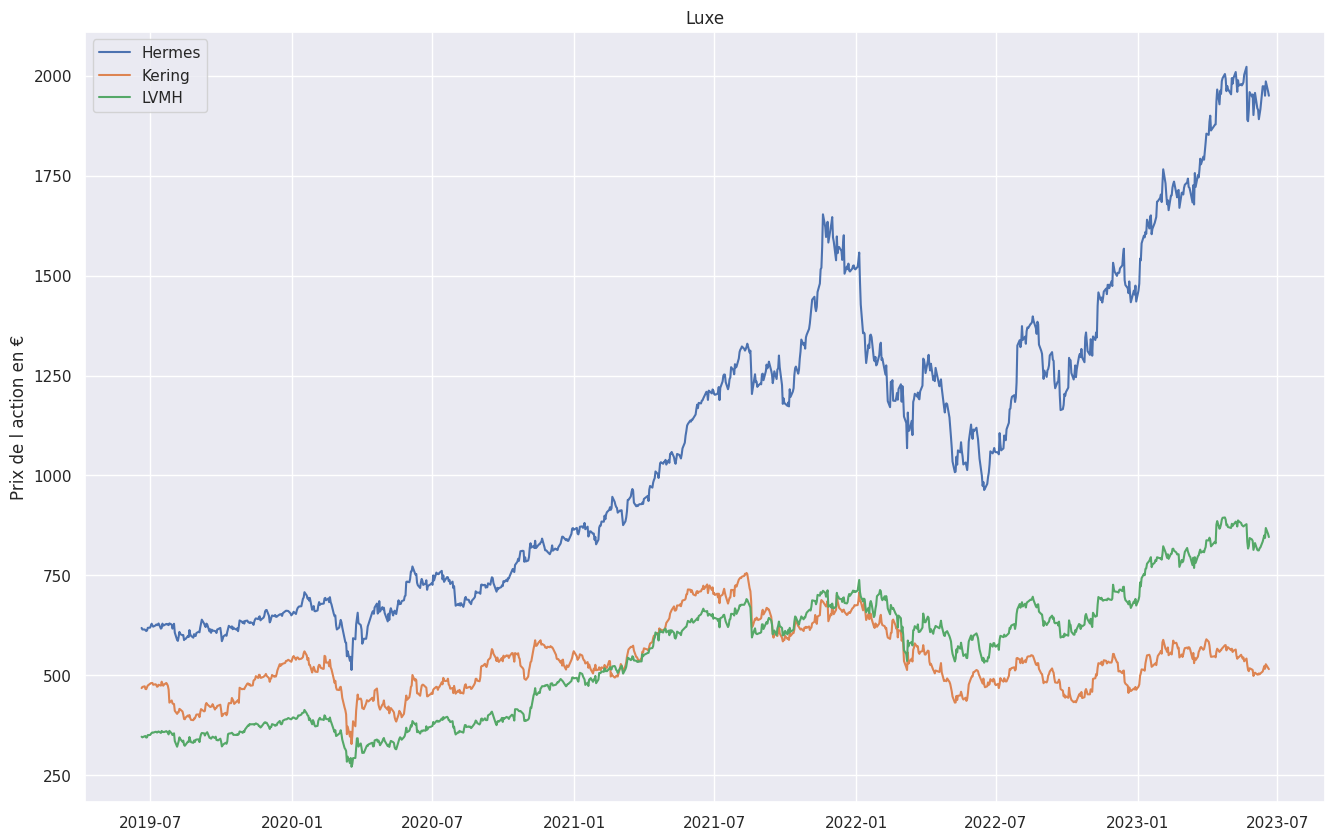

In [30]:
HermesInfo = yf.Ticker("RMS.PA")
KeringInfo = yf.Ticker("KER.PA")
LVMHInfo = yf.Ticker("MC.PA")

data_hermes = HermesInfo.history(period="4y")
data_kering = KeringInfo.history(period="4y")
data_LVMH = LVMHInfo.history(period="4y")

plt.figure(figsize=(16,10))
plt.plot (data_hermes.index,data_hermes["Close"], label="Hermes")
plt.plot(data_kering.index, data_kering["Close"], label = "Kering")
plt.plot(data_LVMH.index, data_LVMH["Close"], label = "LVMH")
plt.title ('Luxe')
plt.ylabel ('Prix de l action en €')
plt.legend()
plt.show()

### La chute de l'action Hermes début 2022 s'explique par le fait que la concurrence affiche elle aussi de trés bon résultats. On peut considérer que ce secteur n'est pas trés optimal pour un placement par secteur. Car quand LVMH progresse les autres actions chutent.


Afin de différencier les tendances par action, on va afficher l'historique descours d'ouverture par action

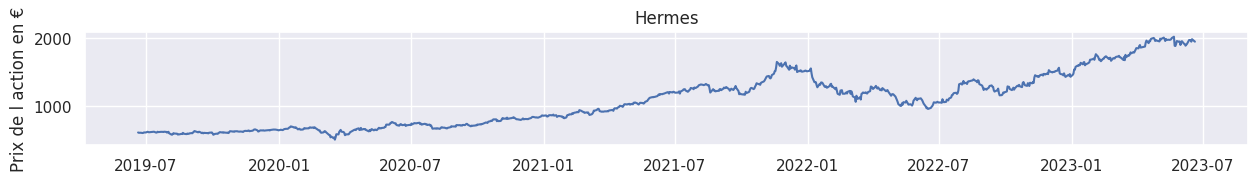

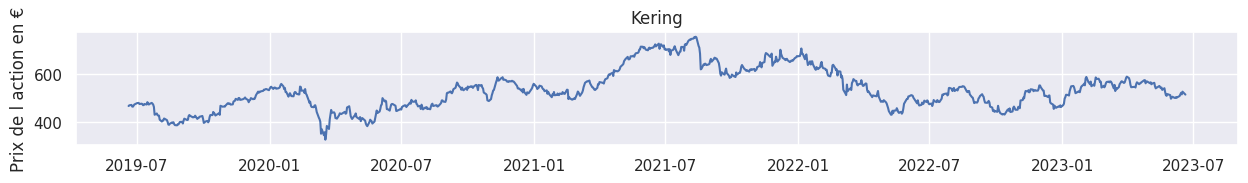

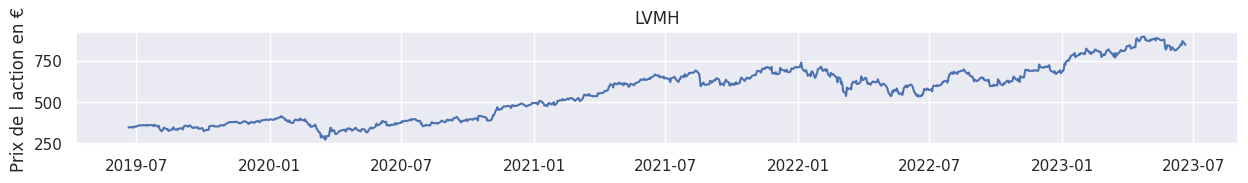

In [31]:
plt.figure(figsize=(15, 5))
#Graphe Hermes
plt.subplot(3,1,1)
plt.plot(data_hermes.index,data_hermes["Close"], label="Hermes")
plt.title('Hermes')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe Kering
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_kering.index, data_kering["Close"], label = "Kering")
plt.title('Kering')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe LVMH
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_LVMH.index, data_LVMH["Close"], label = "LVMH")
plt.title('LVMH')
plt.ylabel('Prix de l action en €')
plt.show()

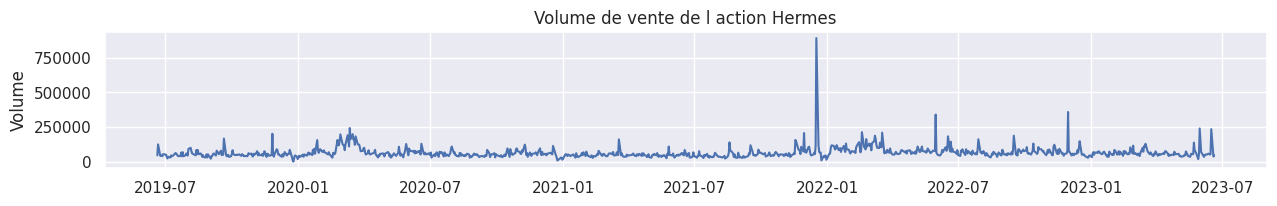

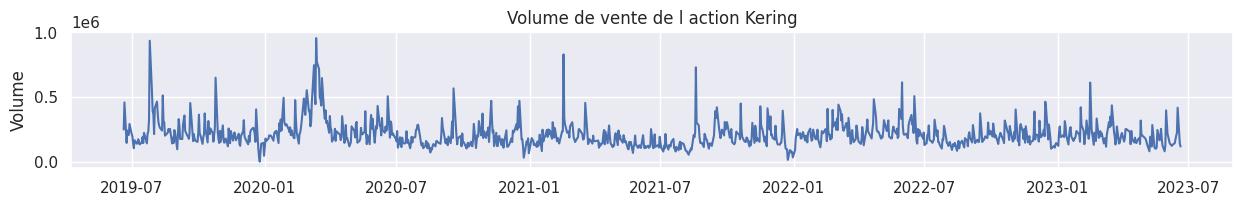

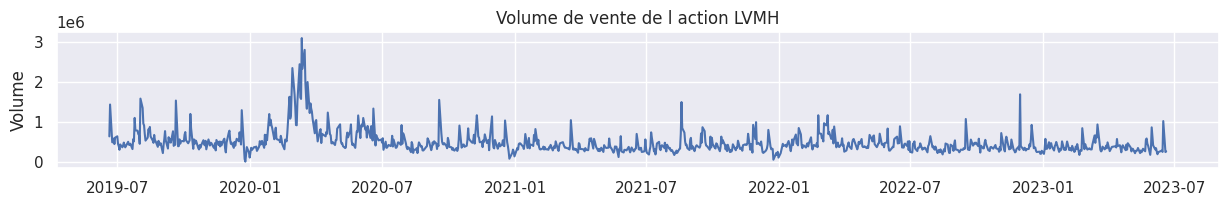

In [32]:
plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)

#Hermes
plt.plot(data_hermes.index,data_hermes["Volume"], label="Hermes")
plt.title('Volume de vente de l action Hermes')
plt.ylabel('Volume')
plt.show();

#Kering
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_kering.index, data_kering["Volume"], label = "Kering")
plt.title('Volume de vente de l action Kering')
plt.ylabel('Volume')
plt.show();

#LVMH
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_LVMH.index, data_LVMH["Volume"], label = "LVMH")
plt.title('Volume de vente de l action LVMH')
plt.ylabel('Volume')
plt.show();

In [33]:
data_hermes['Daily Return'] = data_hermes['Close'].pct_change()
data_kering['Daily Return'] = data_kering['Close'].pct_change()
data_LVMH['Daily Return'] = data_LVMH['Close'].pct_change()

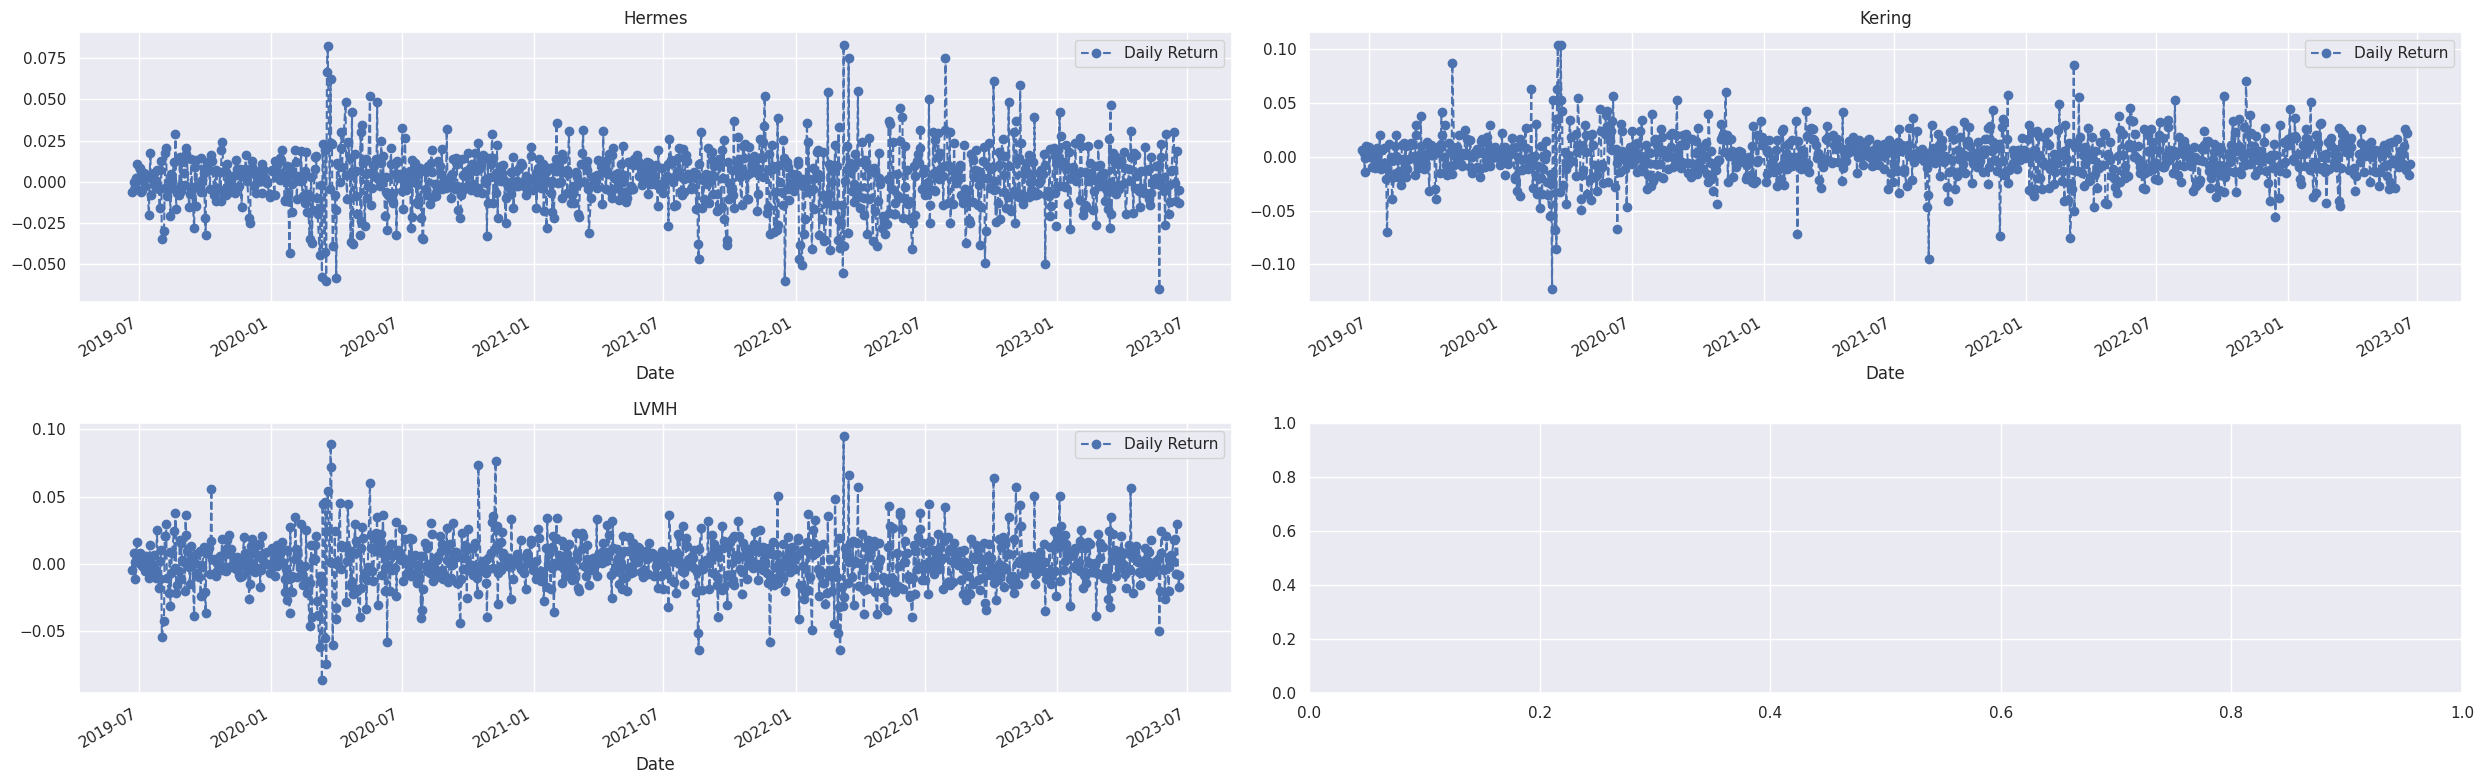

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)

data_hermes['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Hermes')

data_kering['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Kering')

data_LVMH['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('LVMH')

fig.tight_layout()

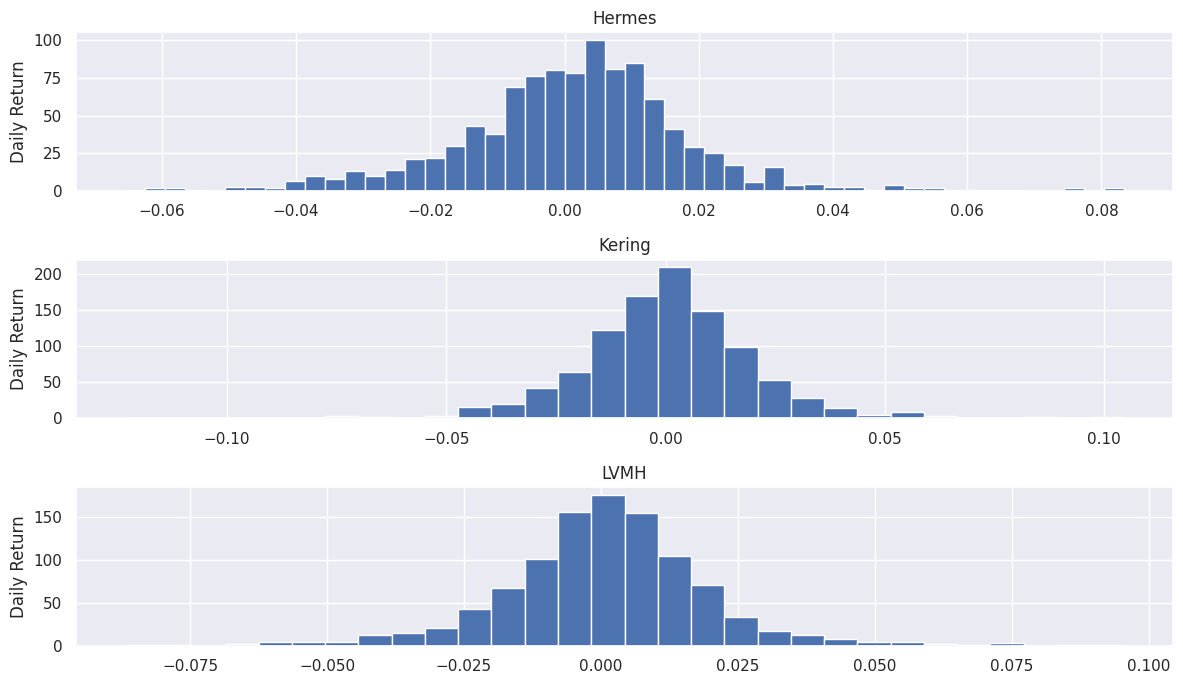

In [35]:
plt.figure(figsize=(12, 7))

#Safran
plt.subplot(3, 1, 1)
data_hermes['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Hermes')

#Air
plt.subplot(3, 1, 2)
data_kering['Daily Return'].hist(bins=30)
plt.ylabel('Daily Return')
plt.title('Kering')

#Thales
plt.subplot(3, 1, 3)
data_LVMH['Daily Return'].hist(bins=30
                                )
plt.ylabel('Daily Return')
plt.title('LVMH')

plt.tight_layout()

In [36]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      data_hermes[column_name] =  data_hermes['Close'].rolling(ma).mean()
      data_kering[column_name] = data_kering['Close'].rolling(ma).mean()
      data_LVMH[column_name] = data_LVMH['Close'].rolling(ma).mean()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

data_hermes[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Hermes')

data_kering[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Kering')

data_LVMH[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('LVMH')


fig.tight_layout()

# **Modélisation**

## **Capital Asset Pricing Model:**
**Analyse des Returns des Assets et le Benchmark (CAC40)**
Outre la prédiction des cours des actions,un autre moyen permet de se positionner par rapport au marché "la rentabilité estimée", le modèle MEDAF permet de quantifier cette rentabilité.
Pour le modèle MEDAF, une analyse YTD est plus pertinente, le dataset se limitera donc sur l'année 2021-2022





[*********************100%***********************]  5 of 5 completed


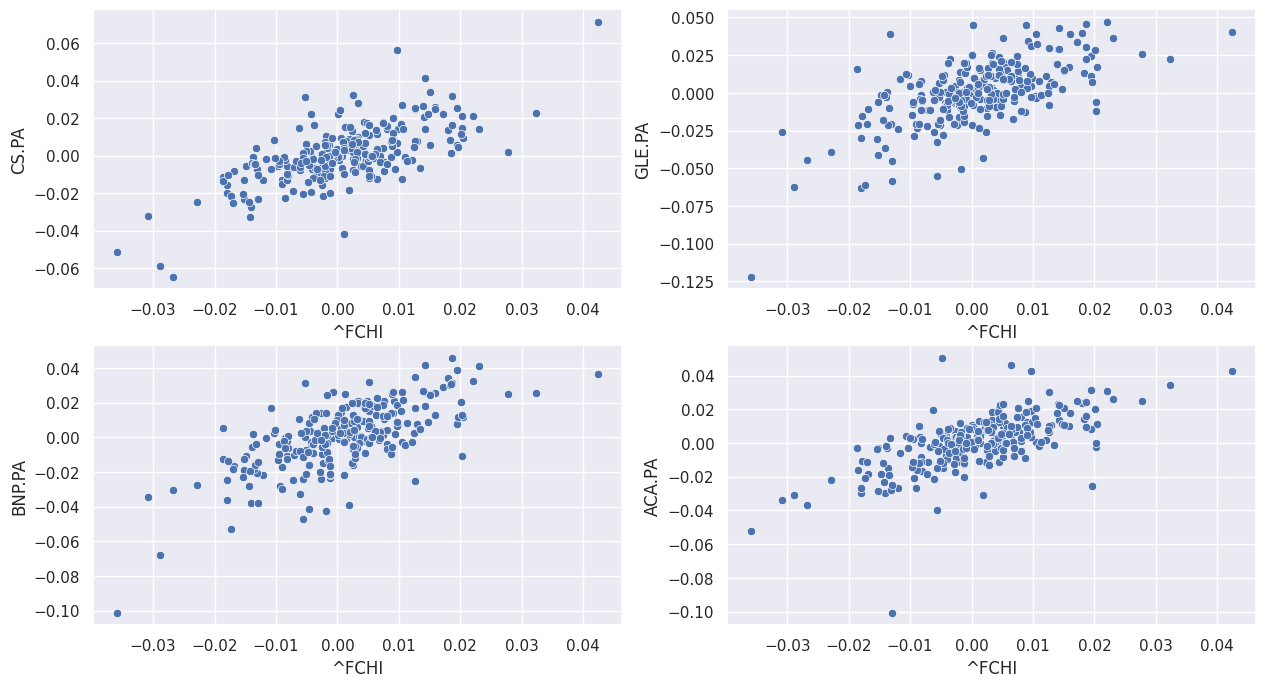

In [39]:
import numpy as np
#Data du CAC40:
end1 = datetime.now()
start1 = datetime(end.year - 1, end.month, end.day)
###############################
ticker_1= ['CS.PA',
'GLE.PA',
'BNP.PA',
'ACA.PA','^FCHI']

Ytickers_CPAM=yf.download(tickers = ticker_1,  # list of tickers
            period = "1y",         # time period
            interval = "1d",       # trading interval
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)
Fin_returns_1Y = Ytickers_CPAM['Close'].pct_change()
Fin_returns_1Y = Fin_returns_1Y.fillna(0)
Fin_returns_1Y.head()
Plot_t = ['CS.PA',
'GLE.PA',
'BNP.PA',
'ACA.PA']
# plot a scatter plot between AXA and the CAC40 (Market)
plt.figure(figsize=(15,8))
for i,t in enumerate(Plot_t,1):
  plt.subplot(2, 2, i)
  sns.scatterplot(data=Fin_returns_1Y,y=t,x='^FCHI')



In [40]:
#Calculons à présent le Beta et l'alpha des actions:**
b={}
a={}
for t in Plot_t:
  beta, alpha = np.polyfit(Fin_returns_1Y['^FCHI'],Fin_returns_1Y[t], 1)
  b[t]=beta
  a[t]=alpha
  print('Beta for {} stock is = {} and alpha is = {}'.format(t, round(beta,8), round(alpha,8)))

Beta for CS.PA stock is = 1.0071457 and alpha is = -0.00018476
Beta for GLE.PA stock is = 1.3029587 and alpha is = -0.00093684
Beta for BNP.PA stock is = 1.24852289 and alpha is = -0.00028199
Beta for ACA.PA stock is = 1.01033229 and alpha is = -0.0001213


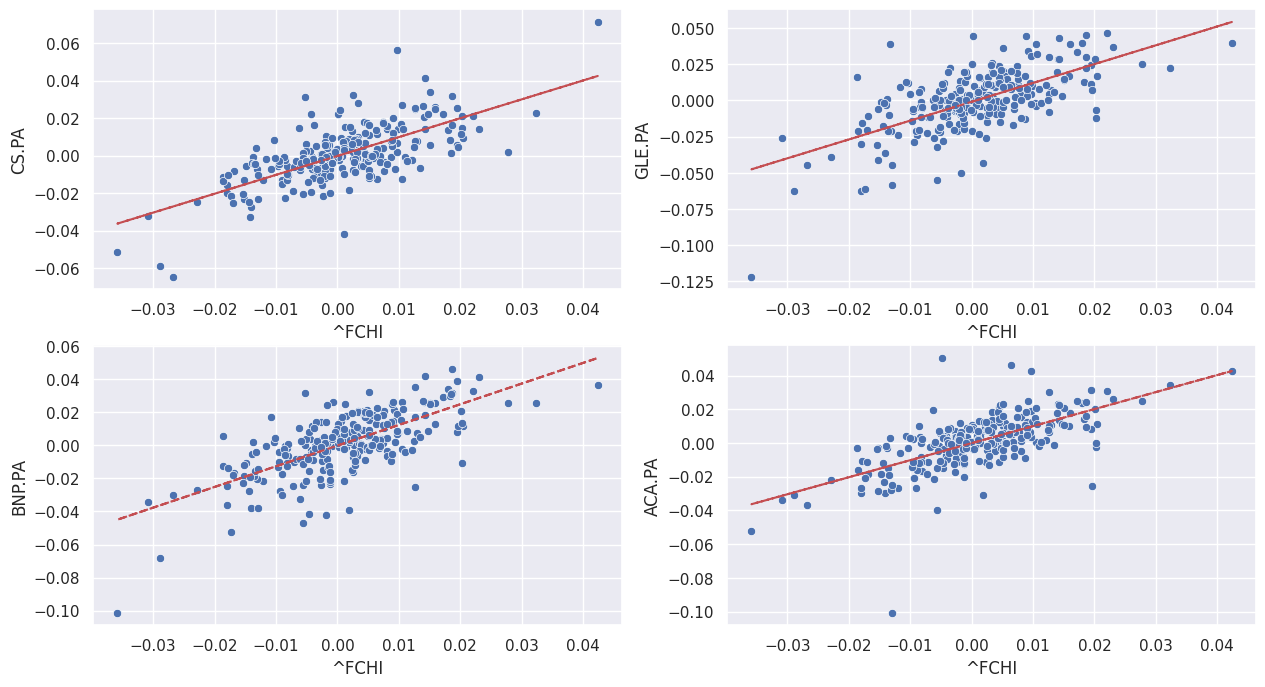

In [41]:
# Now let's plot the scatter plot and the straight line on one plot
plt.figure(figsize=(15,8))
for i,t in enumerate(Plot_t,1):
  plt.subplot(2, 2, i)
  sns.scatterplot(data=Fin_returns_1Y,y=t,x='^FCHI')
  plt.plot(Fin_returns_1Y['^FCHI'], b[t] * Fin_returns_1Y['^FCHI'] + a[t], '--', color = 'r')


# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha




In [42]:
Fin_returns_1Y['^FCHI'].mean()*100
#Beta:
print(b) #Beta of each Equity

{'CS.PA': 1.0071456968267571, 'GLE.PA': 1.3029586952744237, 'BNP.PA': 1.2485228905765293, 'ACA.PA': 1.0103322888403317}


In [43]:
rm = round(Fin_returns_1Y['^FCHI'].mean()*252.3*100,8)
rm
rf=3.0490 #OAT 10 ans
for t in Plot_t:
  ER_Equities = round(rf + ( b[t] * (rm-rf) ) ,3) # Calculate return for each equity vs Bench
  print(ER_Equities,"est la rentabilité espérée de l'asset : ",t)

21.931 est la rentabilité espérée de l'asset :  CS.PA
27.477 est la rentabilité espérée de l'asset :  GLE.PA
26.457 est la rentabilité espérée de l'asset :  BNP.PA
21.991 est la rentabilité espérée de l'asset :  ACA.PA


## **Modèle LSTM:**

Repronons l'exemple de nos 4 actions financières:

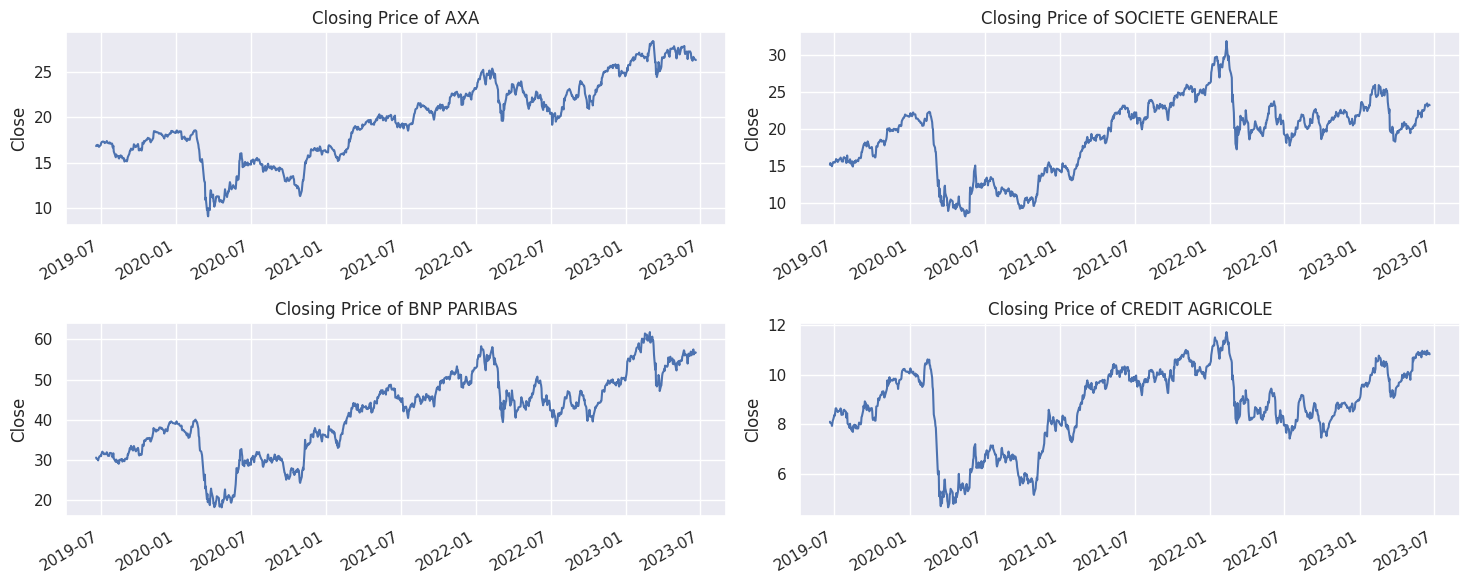

In [47]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {Consumer[i - 1]}")

plt.tight_layout()

Focus Exemple AXA:

In [48]:
import numpy as np
d['AXA'].head()
df = d['AXA'].filter(['Close'])


In [49]:
df.head()

Close
Date                                
2019-06-20 00:00:00+02:00  16.832952
2019-06-21 00:00:00+02:00  16.934906
2019-06-24 00:00:00+02:00  16.967674
2019-06-25 00:00:00+02:00  16.836596
2019-06-26 00:00:00+02:00  16.862083

In [50]:
  import datetime

  def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

  datetime_object = str_to_datetime('2023-04-10')
  datetime_object

datetime.datetime(2023, 4, 10, 0, 0)

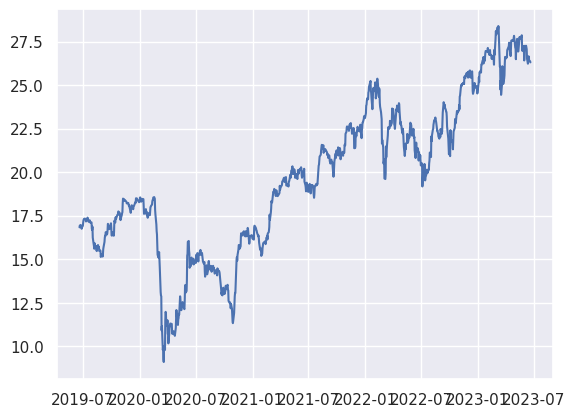

In [51]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [52]:
def window_data(data, n=3):
    windowed_data = pd.DataFrame()

    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

windowed_df=window_data(df)
windowed_df.tail()




Target-3   Target-2   Target-1     Target
Date                                                                 
2023-06-14 00:00:00+02:00  27.059999  26.520000  26.230000  26.655001
2023-06-15 00:00:00+02:00  26.520000  26.230000  26.655001  26.575001
2023-06-16 00:00:00+02:00  26.230000  26.655001  26.575001  26.400000
2023-06-19 00:00:00+02:00  26.655001  26.575001  26.400000  26.370001
2023-06-20 00:00:00+02:00  26.575001  26.400000  26.370001  26.305000

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1,4))
training_set_scaled = sc.fit_transform(windowed_df)


In [54]:

windowed_df.insert(0,'Target Date', windowed_df.index)

In [55]:
windowed_df.tail()

Target Date   Target-3   Target-2  \
Date                                                                        
2023-06-14 00:00:00+02:00 2023-06-14 00:00:00+02:00  27.059999  26.520000   
2023-06-15 00:00:00+02:00 2023-06-15 00:00:00+02:00  26.520000  26.230000   
2023-06-16 00:00:00+02:00 2023-06-16 00:00:00+02:00  26.230000  26.655001   
2023-06-19 00:00:00+02:00 2023-06-19 00:00:00+02:00  26.655001  26.575001   
2023-06-20 00:00:00+02:00 2023-06-20 00:00:00+02:00  26.575001  26.400000   

                            Target-1     Target  
Date                                             
2023-06-14 00:00:00+02:00  26.230000  26.655001  
2023-06-15 00:00:00+02:00  26.655001  26.575001  
2023-06-16 00:00:00+02:00  26.575001  26.400000  
2023-06-19 00:00:00+02:00  26.400000  26.370001  
2023-06-20 00:00:00+02:00  26.370001  26.305000

In [56]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1024,), (1024, 3, 1), (1024,))

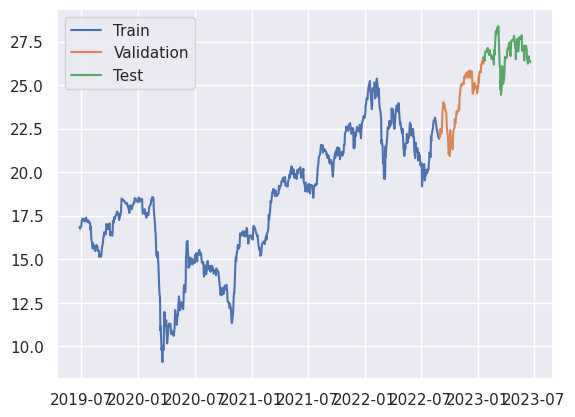

In [57]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
26/26 [==============================] - 5s 60ms/step - loss: 290.1579 - mean_absolute_error: 16.6428 - val_loss: 437.3208 - val_mean_absolute_error: 20.8531
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 142.4323 - mean_absolute_error: 10.9557 - val_loss: 136.4291 - val_mean_absolute_error: 11.5508
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 16.5821 - mean_absolute_error: 3.3694 - val_loss: 25.8414 - val_mean_absolute_error: 4.8266
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 12.1439 - mean_absolute_error: 2.9133 - val_loss: 36.5522 - val_mean_absolute_error: 5.8508
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 9.9696 - mean_absolute_error: 2.6383 - val_loss: 26.9585 - val_mean_absolute_error: 5.0017
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 5.3447 - mean_absolute_error: 1.8587 - val_loss: 11.7882 - val_mean_absolute_error: 3.2213
Epo

26/26 [==============================] - 1s 2ms/step


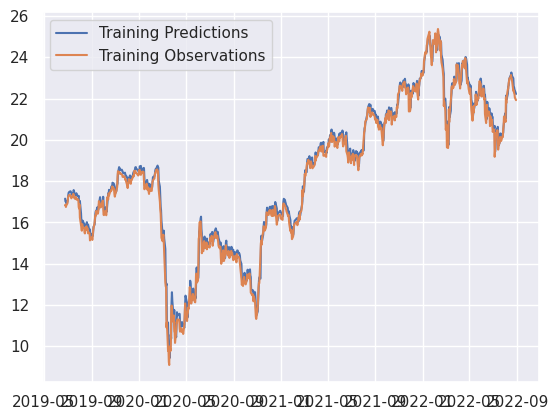

In [59]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 3ms/step


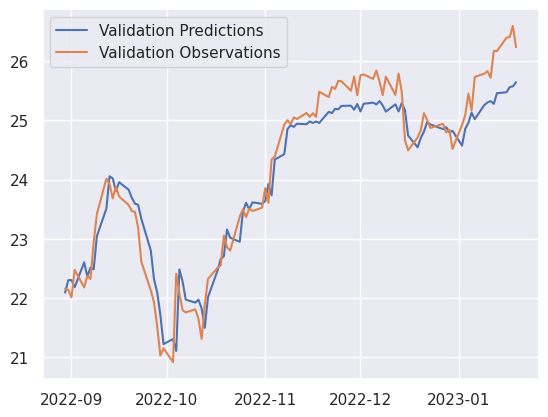

In [60]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 3ms/step


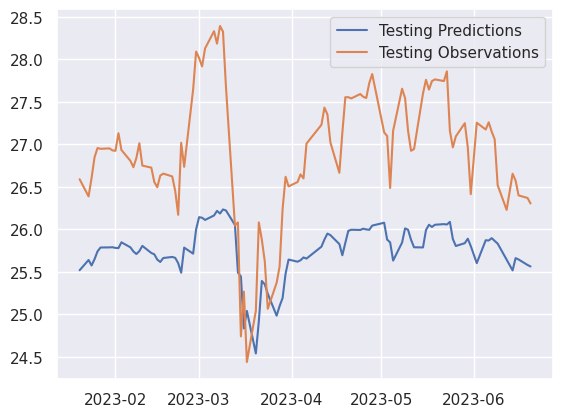

In [61]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

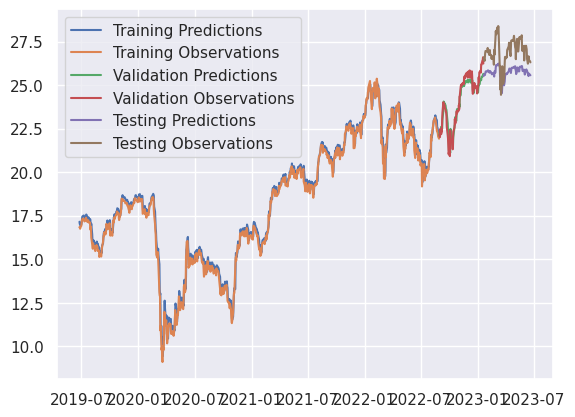

In [62]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

## **Mouvement Brownien-Monte Carlo**

[*********************100%***********************]  1 of 1 completed


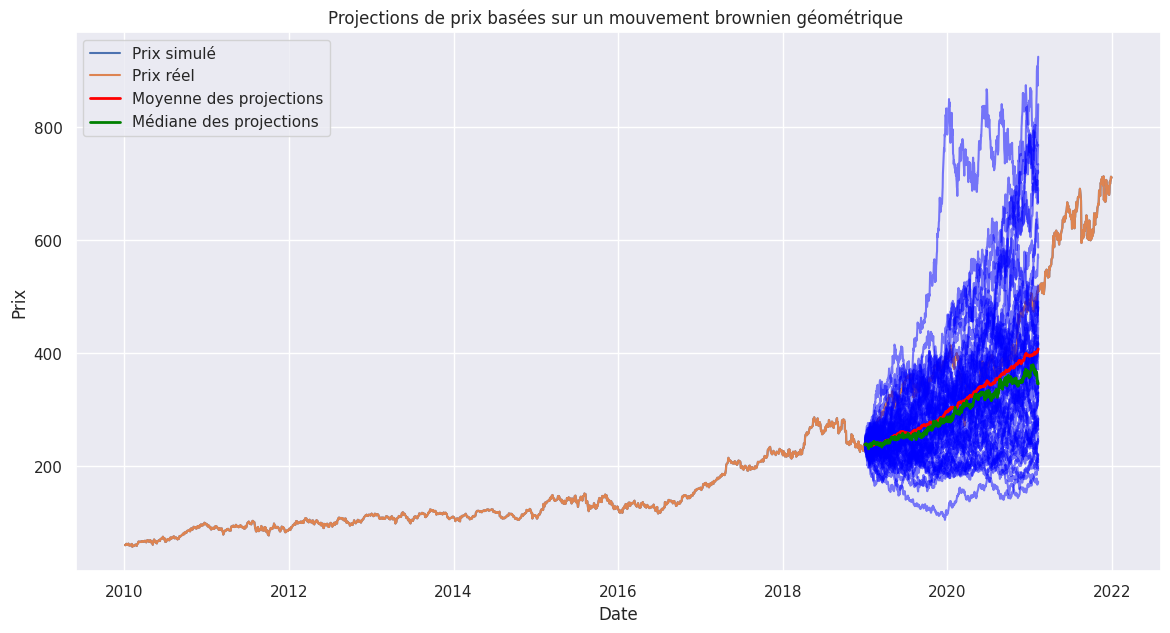

In [66]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Téléchargez les données de l'action LVMH
symbol = "MC.PA"
start_date = "2010-01-01"
end_date = "2021-12-31"
data = yf.download(symbol, start=start_date, end=end_date)
prices = data["Adj Close"]

# Séparez les données d'entraînement et de test
train_data = prices.loc[:"2018-12-31"]
test_data = prices.loc["2019-01-01":]

# Calculez les rendements et les statistiques
returns = train_data.pct_change().dropna()
mean_return = returns.mean()
volatility = returns.std()

# Paramètres de la simulation
num_simulations = 50
forecast_horizon = len(test_data)

# Générer les trajectoires de prix en utilisant un mouvement brownien géométrique
last_price = train_data.iloc[-1]
simulated_prices = np.zeros((forecast_horizon, num_simulations))
dates = pd.date_range(train_data.index[-1], periods=forecast_horizon + 1)[1:]

for i in range(num_simulations):
    random_returns = np.random.normal(mean_return, volatility, forecast_horizon)
    simulated_prices[:, i] = last_price * (1 + random_returns).cumprod()

# Calculez la moyenne des projections
mean_simulated_prices = simulated_prices.mean(axis=1)

# Calculez la mediane des projections
median_simulated_prices = np.median(simulated_prices, axis=1)

# Affichez les trajectoires de prix simulées et les prix réels
plt.figure(figsize=(14, 7))
plt.plot(prices, label="Prix simulé")
plt.plot(prices, label="Prix réel")

for i in range(num_simulations):
    plt.plot(dates, simulated_prices[:, i], alpha=0.5, color='blue')

plt.plot(dates, mean_simulated_prices, color='red', linewidth=2, label="Moyenne des projections")
plt.plot(dates, median_simulated_prices, color='green', linewidth=2, label="Médiane des projections")

plt.title("Projections de prix basées sur un mouvement brownien géométrique ")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.show()



[*********************100%***********************]  1 of 1 completed


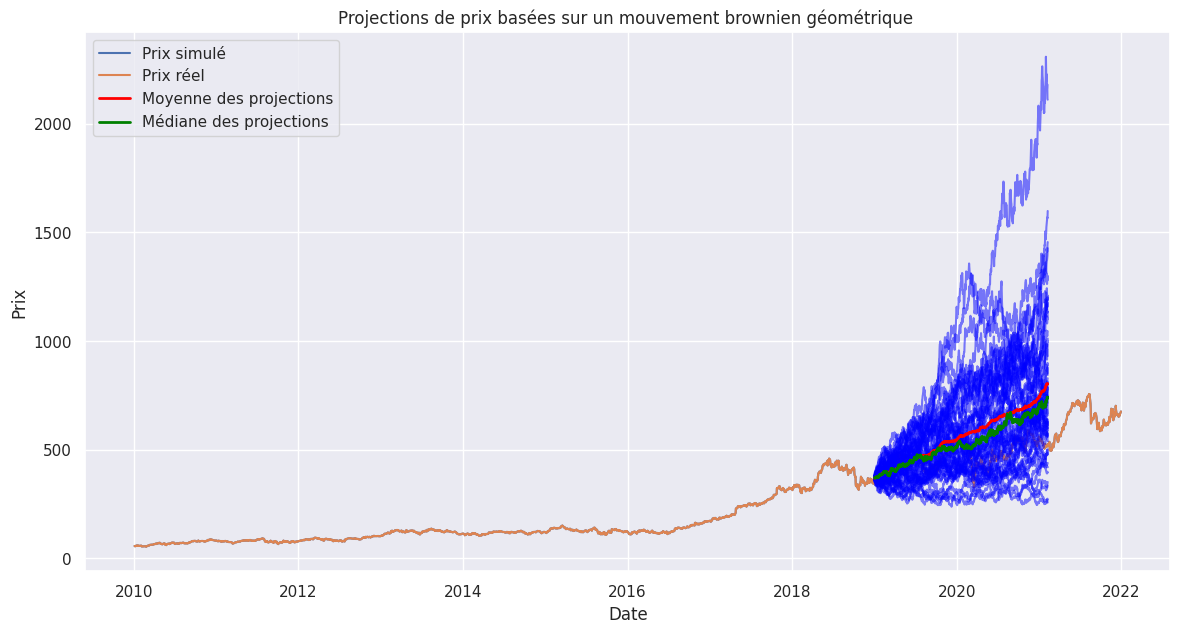

In [67]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Téléchargez les données de l'action KERING
symbol = "KER.PA"
start_date = "2010-01-01"
end_date = "2021-12-31"
data = yf.download(symbol, start=start_date, end=end_date)
prices = data["Adj Close"]

# Séparez les données d'entraînement et de test
train_data = prices.loc[:"2018-12-31"]
test_data = prices.loc["2019-01-01":]

# Calculez les rendements et les statistiques
returns = train_data.pct_change().dropna()
mean_return = returns.mean()
volatility = returns.std()

# Paramètres de la simulation
num_simulations = 50
forecast_horizon = len(test_data)

# Générer les trajectoires de prix en utilisant un mouvement brownien géométrique
last_price = train_data.iloc[-1]
simulated_prices = np.zeros((forecast_horizon, num_simulations))
dates = pd.date_range(train_data.index[-1], periods=forecast_horizon + 1)[1:]

for i in range(num_simulations):
    random_returns = np.random.normal(mean_return, volatility, forecast_horizon)
    simulated_prices[:, i] = last_price * (1 + random_returns).cumprod()

# Calculez la moyenne des projections
mean_simulated_prices = simulated_prices.mean(axis=1)

# Calculez la mediane des projections
median_simulated_prices = np.median(simulated_prices, axis=1)

# Affichez les trajectoires de prix simulées et les prix réels
plt.figure(figsize=(14, 7))
plt.plot(prices, label="Prix simulé")
plt.plot(prices, label="Prix réel")

for i in range(num_simulations):
    plt.plot(dates, simulated_prices[:, i], alpha=0.5, color='blue')

plt.plot(dates, mean_simulated_prices, color='red', linewidth=2, label="Moyenne des projections")
plt.plot(dates, median_simulated_prices, color='green', linewidth=2, label="Médiane des projections")

plt.title("Projections de prix basées sur un mouvement brownien géométrique ")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


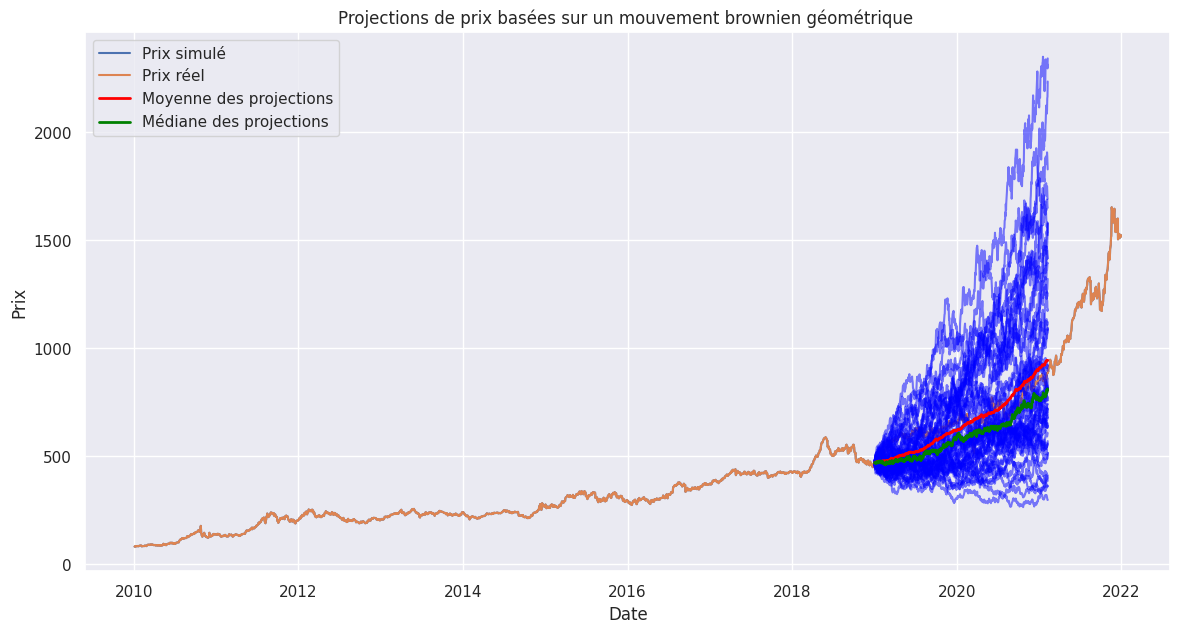

In [68]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Téléchargez les données de l'action HERMES
symbol = "RMS.PA"
start_date = "2010-01-01"
end_date = "2021-12-31"
data = yf.download(symbol, start=start_date, end=end_date)
prices = data["Adj Close"]

# Séparez les données d'entraînement et de test
train_data = prices.loc[:"2018-12-31"]
test_data = prices.loc["2019-01-01":]

# Calculez les rendements et les statistiques
returns = train_data.pct_change().dropna()
mean_return = returns.mean()
volatility = returns.std()

# Paramètres de la simulation
num_simulations = 50
forecast_horizon = len(test_data)

# Générer les trajectoires de prix en utilisant un mouvement brownien géométrique
last_price = train_data.iloc[-1]
simulated_prices = np.zeros((forecast_horizon, num_simulations))
dates = pd.date_range(train_data.index[-1], periods=forecast_horizon + 1)[1:]

for i in range(num_simulations):
    random_returns = np.random.normal(mean_return, volatility, forecast_horizon)
    simulated_prices[:, i] = last_price * (1 + random_returns).cumprod()

# Calculez la moyenne des projections
mean_simulated_prices = simulated_prices.mean(axis=1)

# Calculez la mediane des projections
median_simulated_prices = np.median(simulated_prices, axis=1)

# Affichez les trajectoires de prix simulées et les prix réels
plt.figure(figsize=(14, 7))
plt.plot(prices, label="Prix simulé")
plt.plot(prices, label="Prix réel")

for i in range(num_simulations):
    plt.plot(dates, simulated_prices[:, i], alpha=0.5, color='blue')

plt.plot(dates, mean_simulated_prices, color='red', linewidth=2, label="Moyenne des projections")
plt.plot(dates, median_simulated_prices, color='green', linewidth=2, label="Médiane des projections")

plt.title("Projections de prix basées sur un mouvement brownien géométrique ")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.show()